# Project: Predict car prices

 ## Table of Content:
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#wrangling'>Data Wrangling</a></li>
    <li><a href='#feature'>Feature Engineering & Extraction</a></li>
    <li><a href='#eda'>Exploratory Data Analysis</a></li>
    <li><a href='#mchl'>Machine Learning Models</a></li>
    <li><a href='#conclusions'>Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**Problem Statement**
* A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

* They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
* Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market, you can find the dataset [here](https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv).

**Business Goal**
* We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

### Imports 

In [360]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':[15,8]},font_scale=1.2,palette='rocket')
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

import joblib

<a id='wrangling'></a>
## Data Wrangling
process contains
* Data discovery
* Data Structure
* Data Cleaning 
* Data enriching
* Data Validating
* Data Publishing

**Data Discovery**

In [281]:
def load_data(path):
    try:
        df = pd.read_csv(path)
        df.name = path.split("//")[-1].split(".")[0]
    except Exception as exception:
        assert type(exception).__name__ == 'NameError'
        assert exception.__class__.__name__ == 'NameError'
        assert exception.__class__.__qualname__ == 'NameError'
    else:
        print(f"{df.name} dataset loaded successfuly")
        return df

In [282]:
df = load_data("Datasets//CarPrice_Assignment.csv")

CarPrice_Assignment dataset loaded successfuly


In [283]:
def explore_data(df,num=5):
    try:
        name = df.name
    except:
        name = 'new dataset'
    finally:
        pd.set_option('display.max_columns', len(df.columns))
        print(f'{name} contains {df.shape[0]} rows & {df.shape[1]} columns')
        print(f'Top {num} rows')
        display(df.head(num))
        print('*' * 50)
        print(f'Last {num} rows')
        display(df.tail(num))
        print('*' * 50)

In [284]:
explore_data(df)

CarPrice_Assignment contains 205 rows & 26 columns
Top 5 rows


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**************************************************
Last 5 rows


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


**************************************************


In [285]:
def datatype(df):
    try:
        name = df.name
    except:
        name = 'new dataset'
    finally:
        print(f'{name} datatype & count missing values')
        df_type = pd.DataFrame()
        df_type['features'] = df.columns
        df_type['first_val'] = pd.Series([df[col][0] for col in df.columns])
        df_type.set_index('features',inplace=True)
        df_type['dtype'] = df.dtypes
        df_type['cnt_missing'] = df.isna().sum()
        df_type['missing_%'] = df.isna().sum()/ df.shape[0]
        print(df_type)

In [286]:
datatype(df)

CarPrice_Assignment datatype & count missing values
                           first_val    dtype  cnt_missing  missing_%
features                                                             
car_ID                             1    int64            0        0.0
symboling                          3    int64            0        0.0
CarName           alfa-romero giulia   object            0        0.0
fueltype                         gas   object            0        0.0
aspiration                       std   object            0        0.0
doornumber                       two   object            0        0.0
carbody                  convertible   object            0        0.0
drivewheel                       rwd   object            0        0.0
enginelocation                 front   object            0        0.0
wheelbase                       88.6  float64            0        0.0
carlength                      168.8  float64            0        0.0
carwidth                        64.1  

In [287]:
def duplicated_val(df):
    print(f'{df.name} contains {df.duplicated().sum()} duplicated values')
    if df.duplicated().sum() > 0:
        print(df[df.duplicated(keep='first')])
        print(df[df.duplicated(keep='last')])

In [288]:
duplicated_val(df)

CarPrice_Assignment contains 0 duplicated values


In [289]:
def quantitative_describtive(df):
    stats = df.describe()
    stats.loc['range'] = stats.loc['max'] - stats.loc['min']
    stats.loc['iqr'] = stats.loc['75%'] - stats.loc['25%']
    stats.loc['min_whisker'] = stats.loc['25%'] - 1.5 * stats.loc['iqr'] 
    stats.loc['max_whisker'] = stats.loc['75%'] + 1.5 * stats.loc['iqr'] 
    display(stats)

In [290]:
quantitative_describtive(df)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000
range,204.000000,5.000000,34.300000,67.000000,12.000000,12.000000,2578.000000,265.000000,1.400000,2.100000,16.000000,240.000000,2450.000000,36.000000,38.000000,40282.000000
iqr,102.000000,2.000000,7.900000,16.800000,2.800000,3.500000,790.000000,44.000000,0.430000,0.300000,0.800000,46.000000,700.000000,11.000000,9.000000,8715.000000


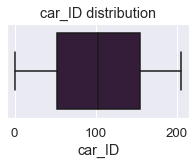

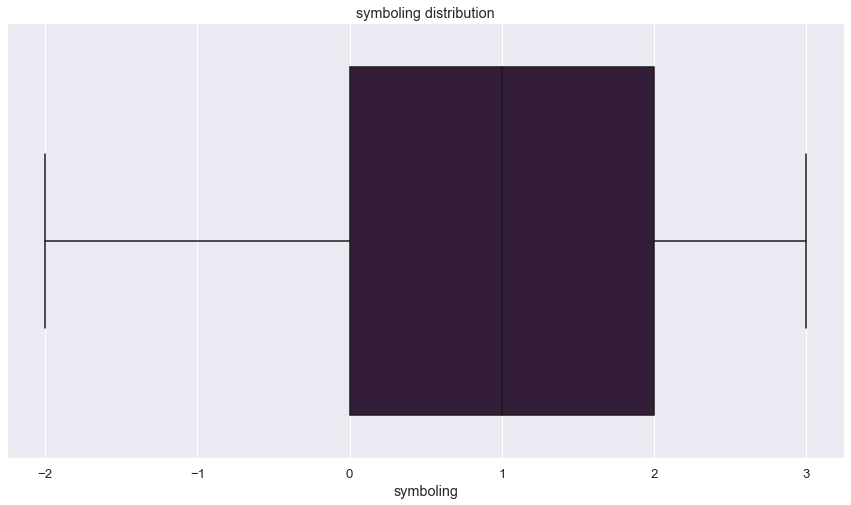

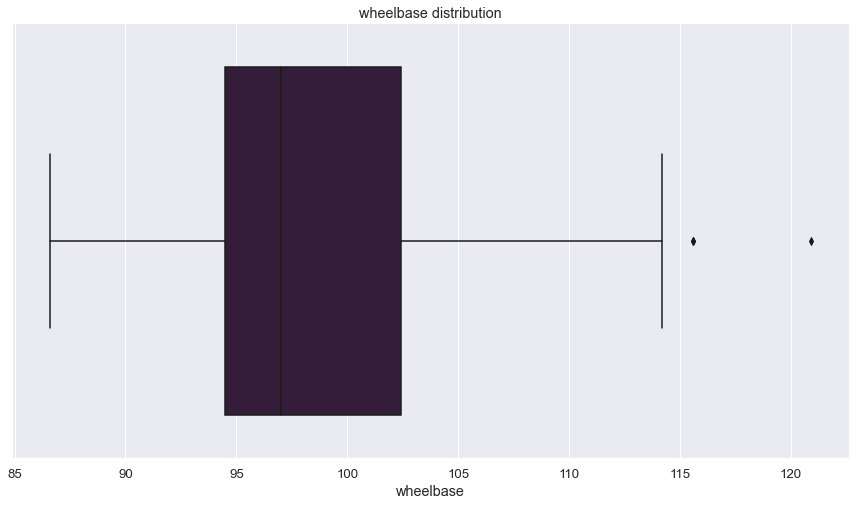

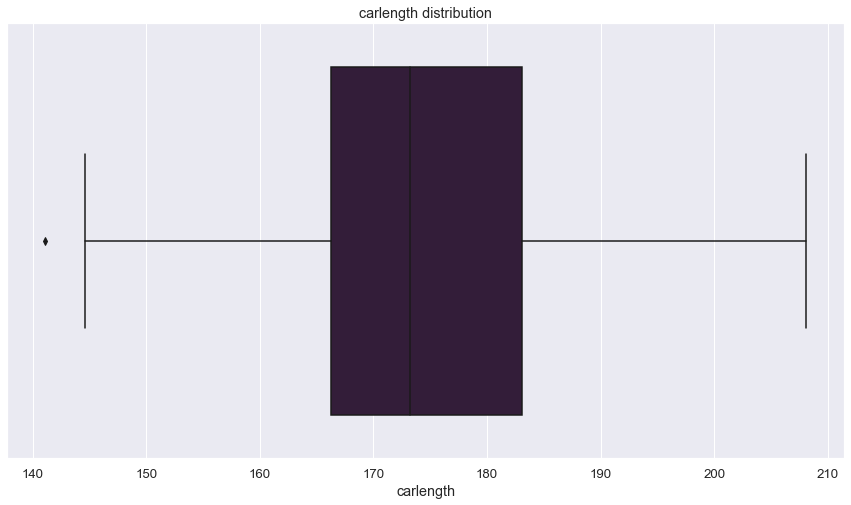

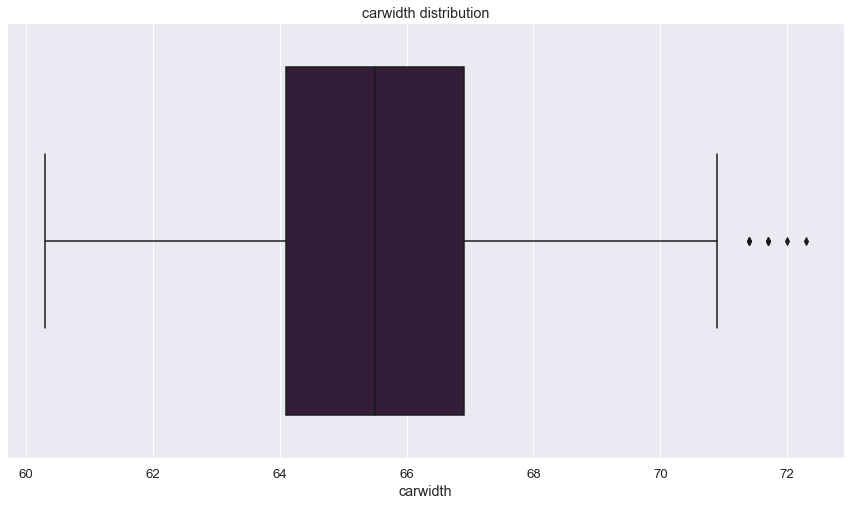

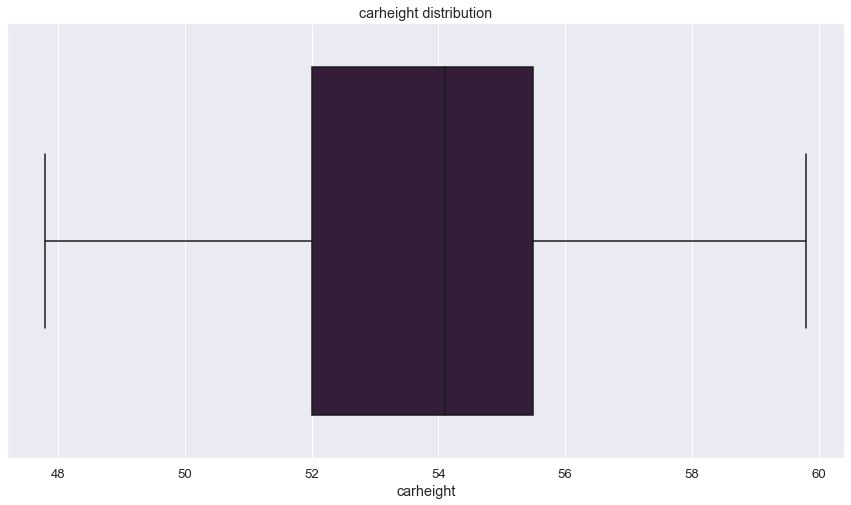

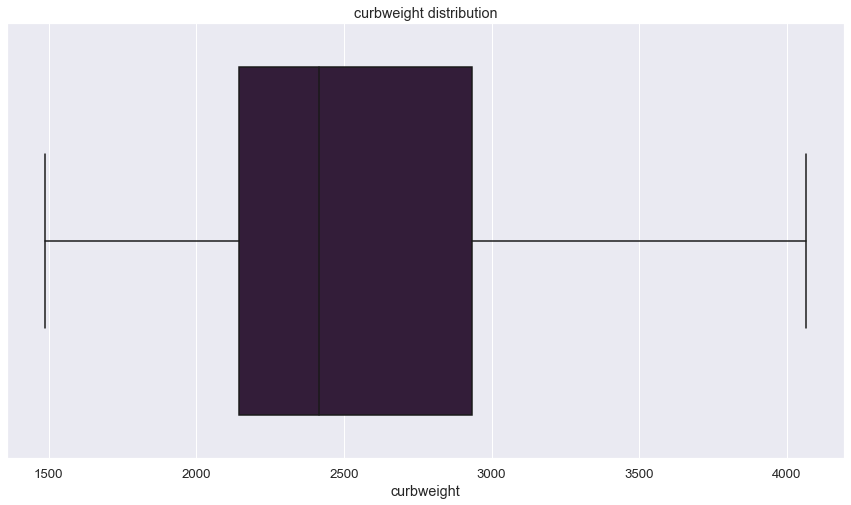

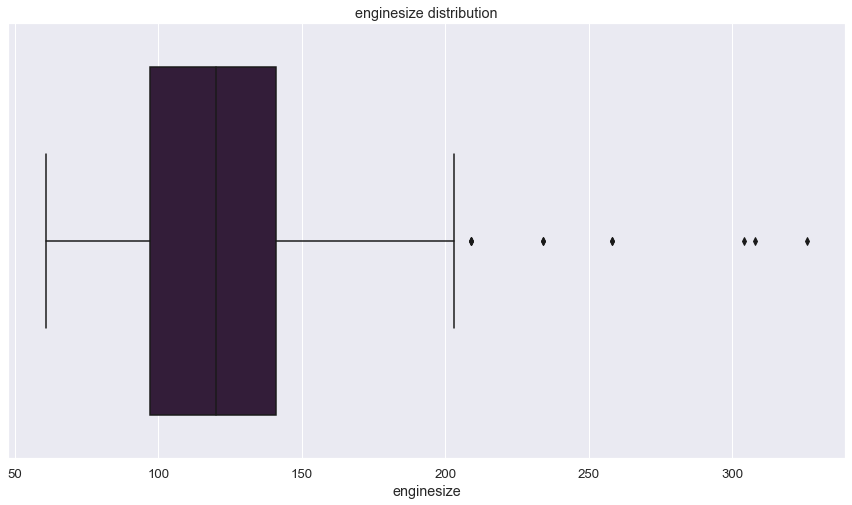

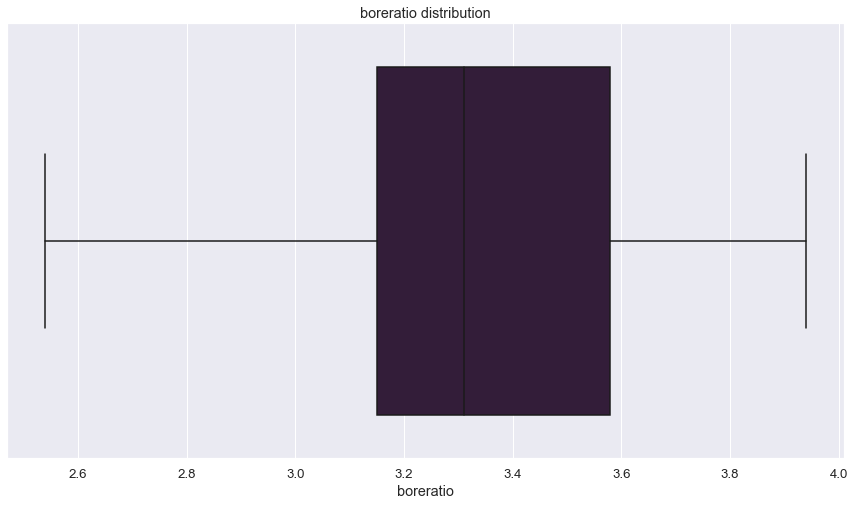

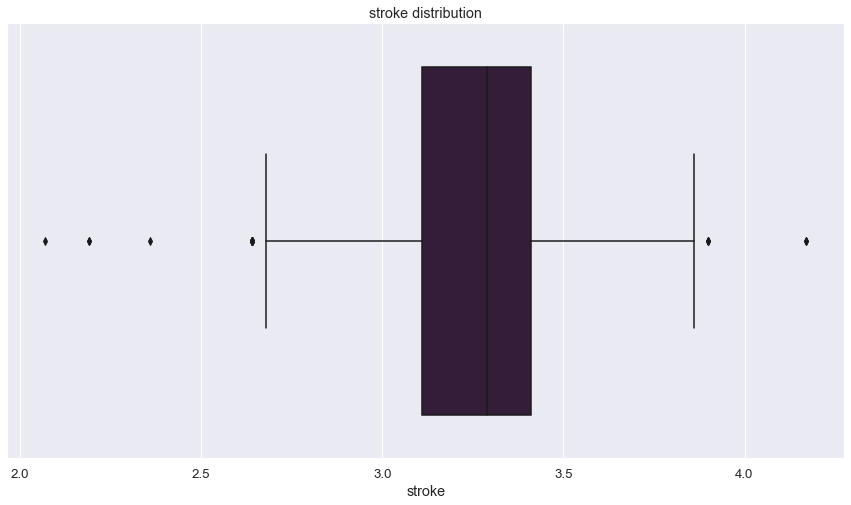

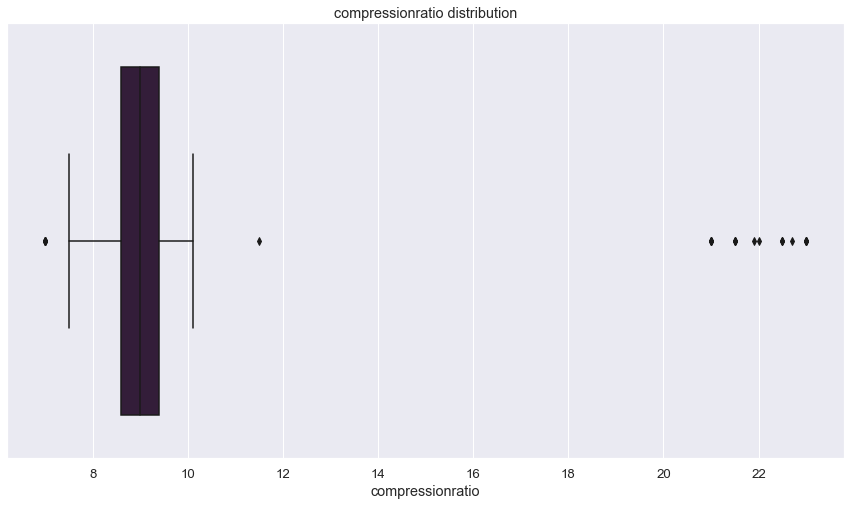

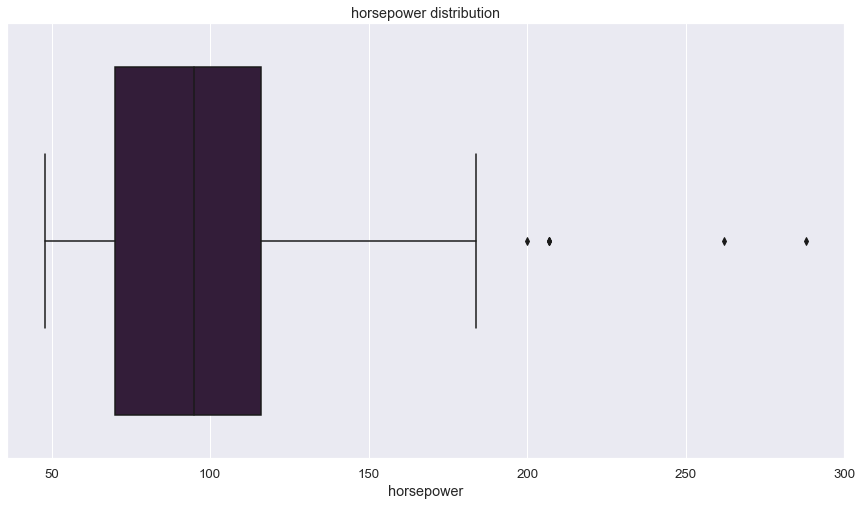

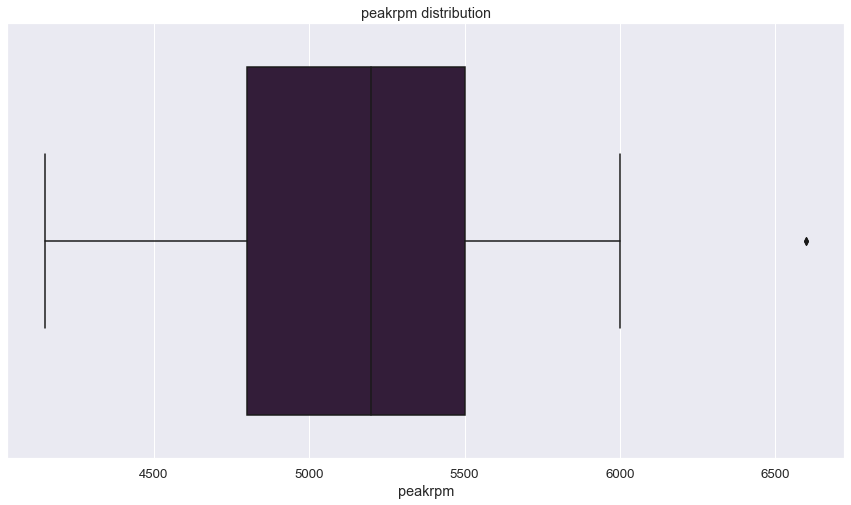

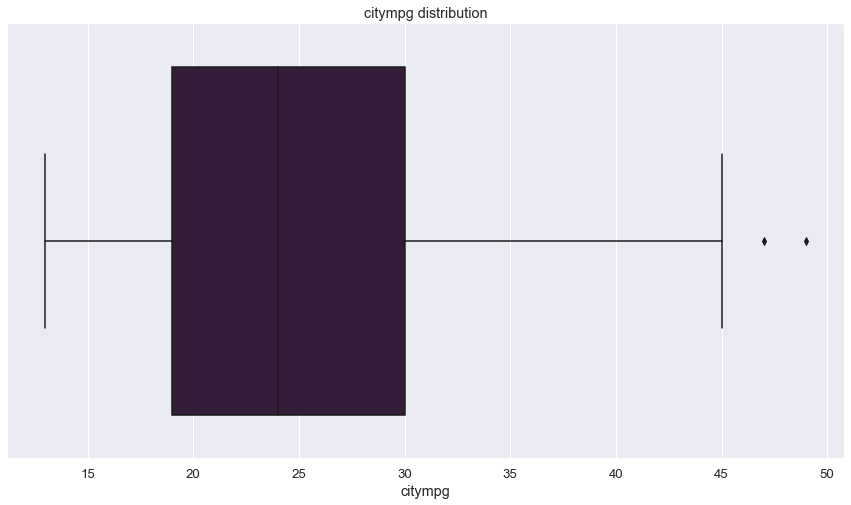

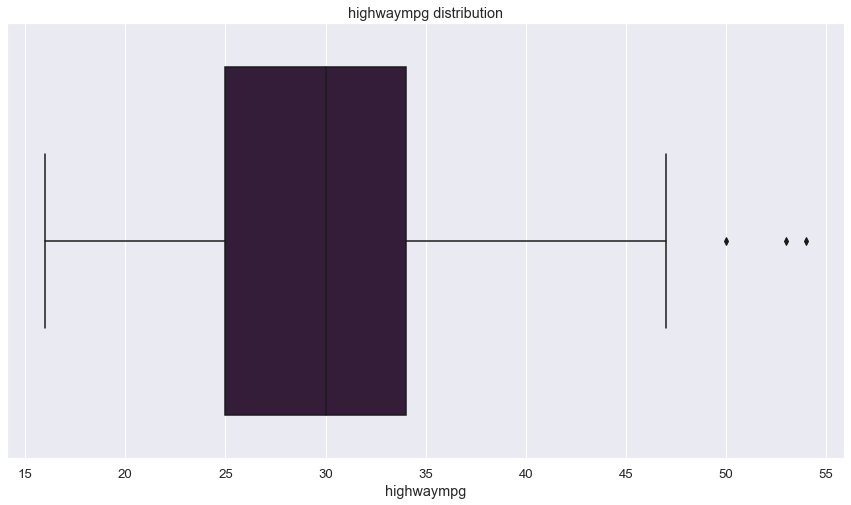

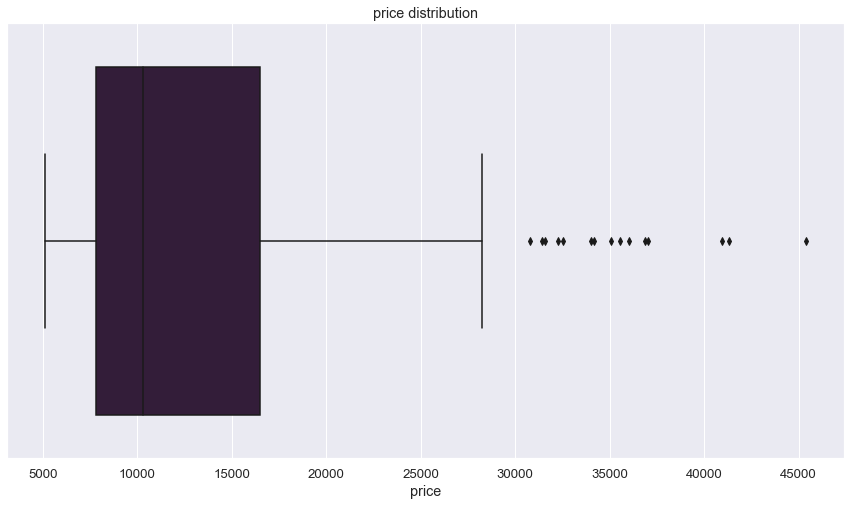

In [291]:
nrows = ncols = 4
fig = plt.figure()
for i,col in enumerate(df.select_dtypes(include=['number']).columns):
    ax= fig.add_subplot(nrows,ncols,i+1)
    ax = sns.boxplot(data=df,x=col)
    plt.title(f'{col} distribution')
    plt.show()

In [292]:
def qualitative_describtive(df):
    display(df.describe(include=['O']))
    for col in df.select_dtypes(include=['O']).columns:
        sns.countplot(data=df,x=col)
        plt.title(f'{col} Frequency')
        plt.show()
        if df[col].nunique()<=10:
            print(df[col].value_counts(),'\n','*'*50)
       

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


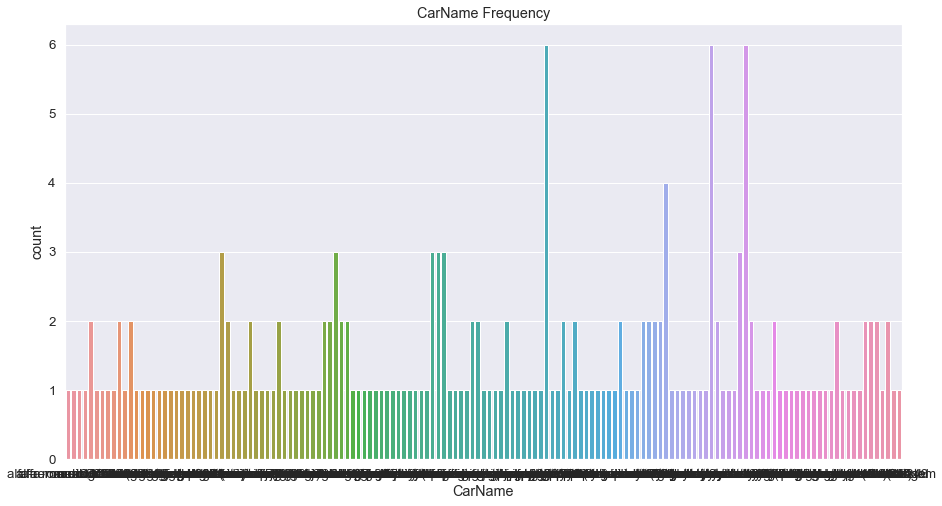

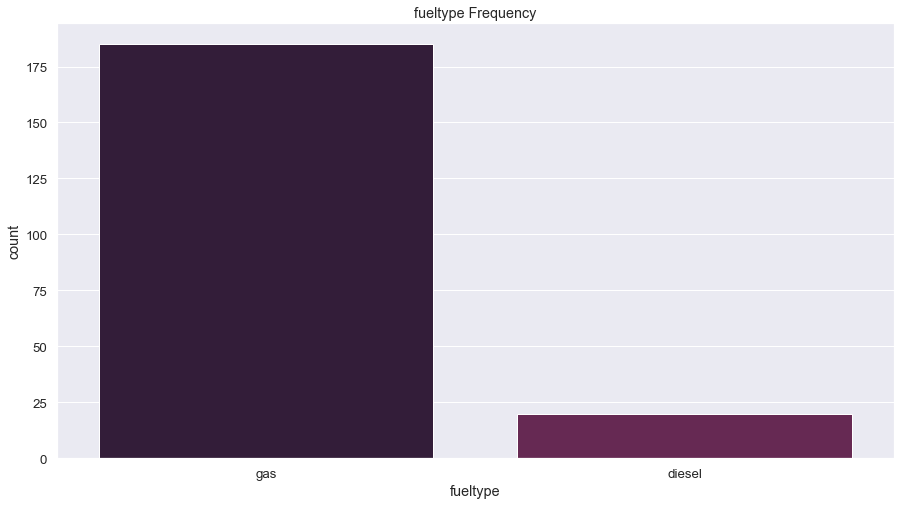

gas       185
diesel     20
Name: fueltype, dtype: int64 
 **************************************************


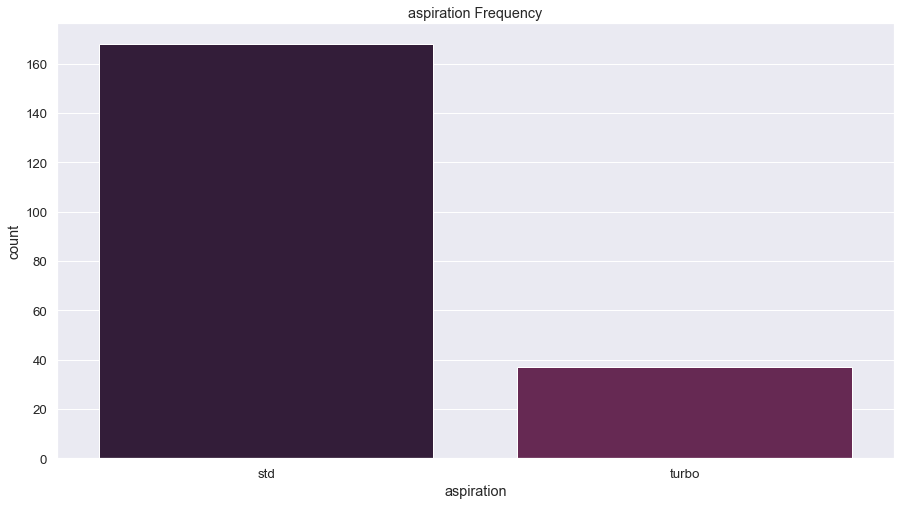

std      168
turbo     37
Name: aspiration, dtype: int64 
 **************************************************


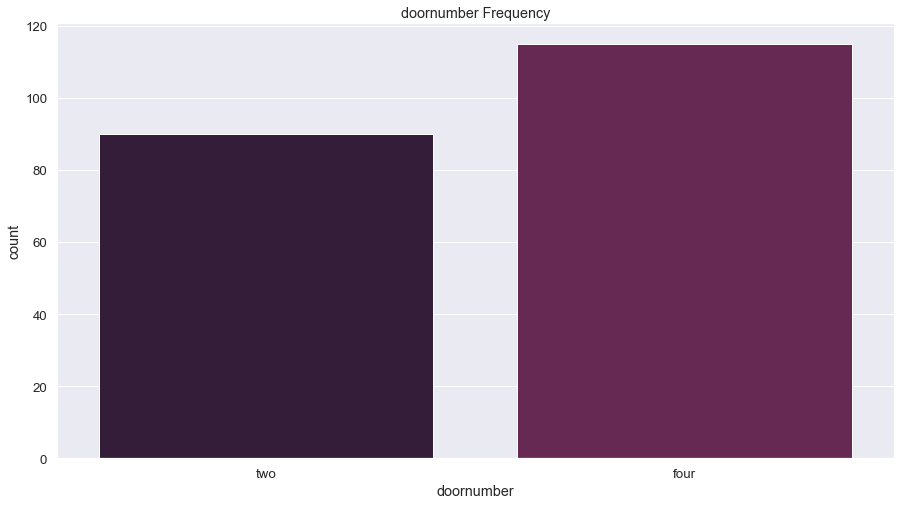

four    115
two      90
Name: doornumber, dtype: int64 
 **************************************************


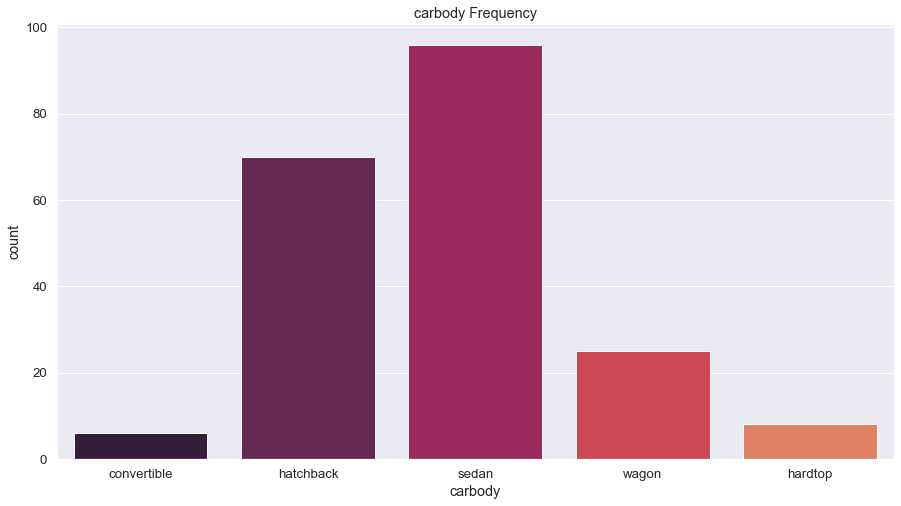

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 
 **************************************************


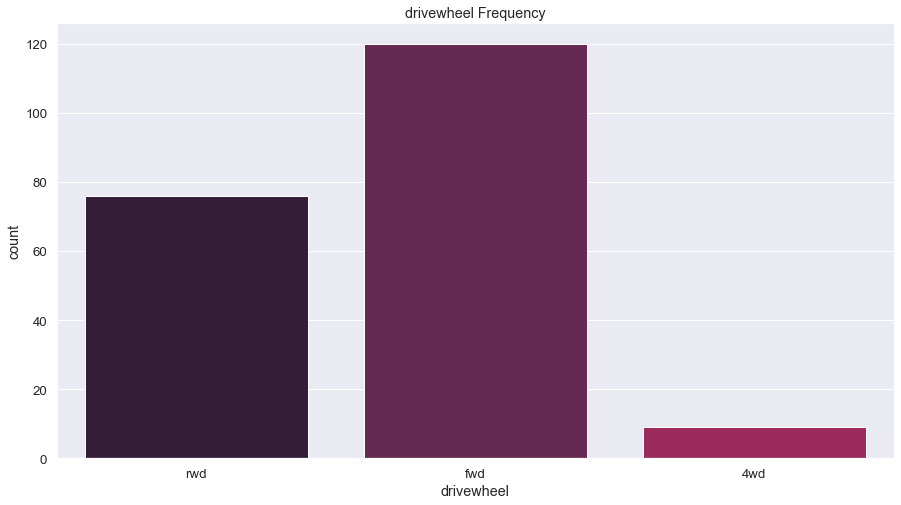

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 
 **************************************************


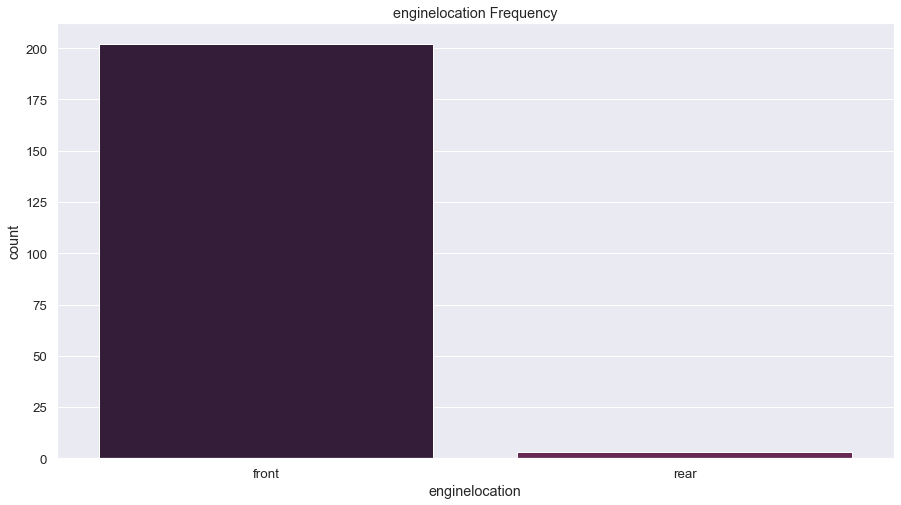

front    202
rear       3
Name: enginelocation, dtype: int64 
 **************************************************


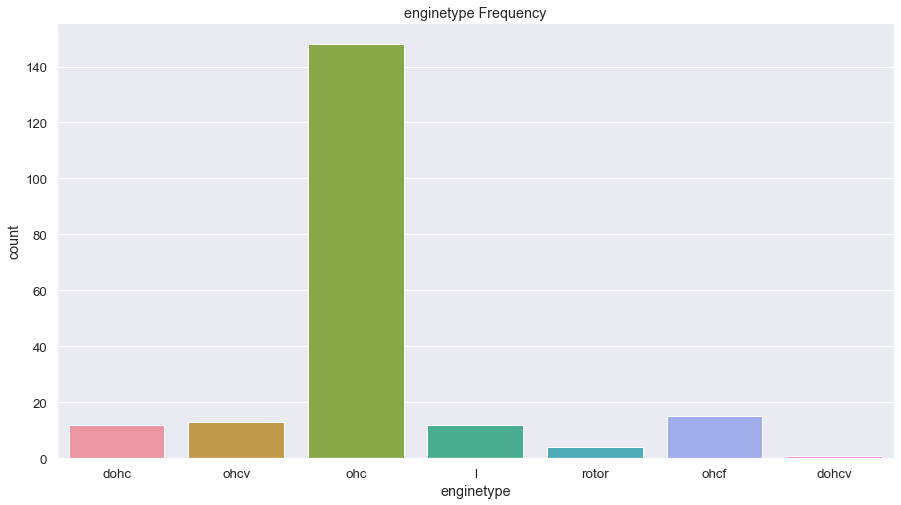

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 
 **************************************************


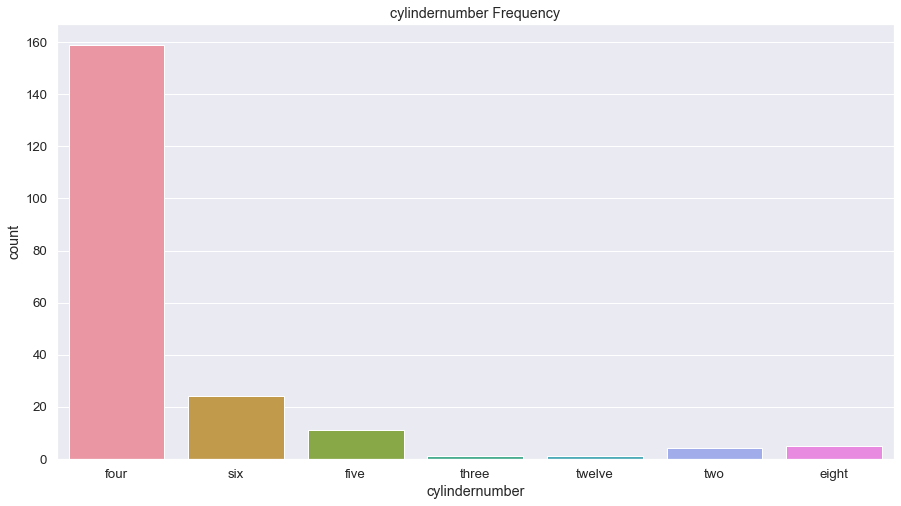

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64 
 **************************************************


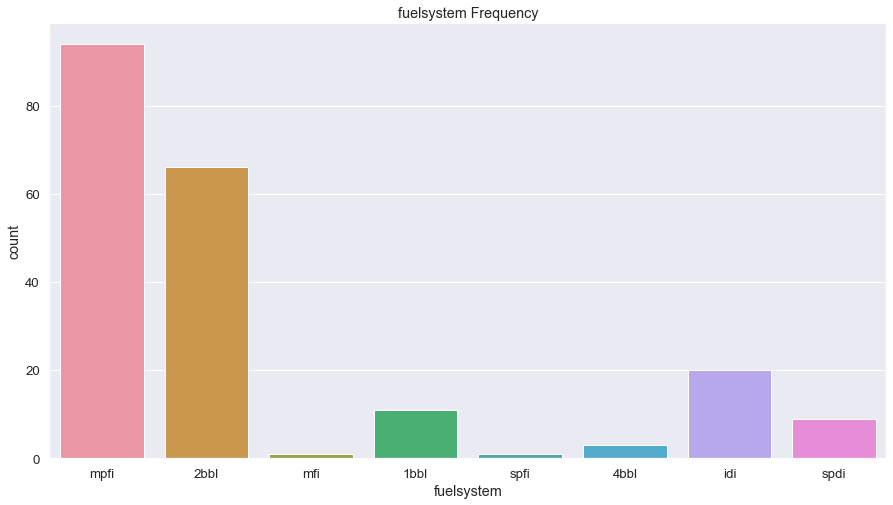

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64 
 **************************************************


In [293]:
qualitative_describtive(df)

#### Findings:
<ol>
<li>CarPrice_Assignment contains 205 rows & 26 columns.</li>
<li>CarPrice_Assignment contains quantitative & qualitative data type, there are no problem on data type however we will display some in another data type later for easily use.</li>
<li>Dataset doesn't have missing values neither duplicates values.</li>    
<li>some quanitative features have outliers like wheelbase, carlength, carwidth, enginesize, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg & price.</li>
<li>dataset contains 10 qualitative features.</li>
</ol>

**Data Cleaning**

**Drop unneeded column**

In [294]:
df.drop('car_ID',axis=1,inplace=True)

<a id='#feature'></a>
## Feature Engineering & Extraction

In [295]:
df['CarName'].unique().tolist()

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero Quadrifoglio',
 'audi 100 ls',
 'audi 100ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu MU-X',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'maxda rx3',
 'maxda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda glc deluxe',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick elect

In [296]:
df['CarName'] = df['CarName'].str.split(" ",expand=True)[0]

In [297]:
df['CarName'].unique().tolist()

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'buick',
 'mercury',
 'mitsubishi',
 'Nissan',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'porcshce',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'vw',
 'volvo']

* we can find that some carName are duplicated as different type will unify it 
    * Nissan, nissan
    * maxda,mazda
    * porsche, porcshce
    * toyouta, toyota
    * vokswagen,vw, volkswagen

In [298]:
df['CarName'].replace({'Nissan': 'nissan','maxda':'mazda','porcshce':'porsche','toyouta': 'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

In [299]:
df['CarName'].unique().tolist()

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'buick',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li>Univariate Analysis</li>
<li>Bivariate Analysis</li>
<li>Multivariate Analysis</li>
    </ul>

### Univariate Analysis
#### Quantitative Variables

In [300]:
def uni_quantitative(df):
    for col in df.select_dtypes(include=['number']).columns:
        fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
        ax1 = sns.histplot(data=df,x=col,palette="light:m_r",ax=ax[0],kde=True)
        ax2 = sns.boxplot(data=df,x=col,palette="light:m_r",ax=ax[1])
        plt.suptitle(f'{col} distribution')
        plt.show()
        stats= df[col].describe()
        stats.loc['range'] = stats.loc['max'] - stats.loc['min']
        stats.loc['iqr'] = stats.loc['75%'] - stats.loc['25%']
        stats.loc['min_whisker'] = stats.loc['25%'] - 1.5 * stats.loc['iqr']
        stats.loc['max_whisker'] = stats.loc['75%'] + 1.5 * stats.loc['iqr']
        display(pd.DataFrame(stats).T)

    

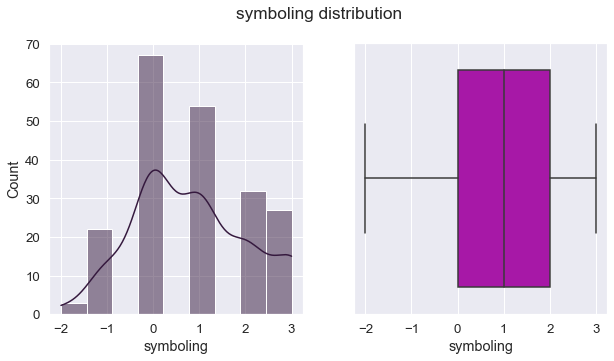

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0,5.0,2.0,-3.0,5.0


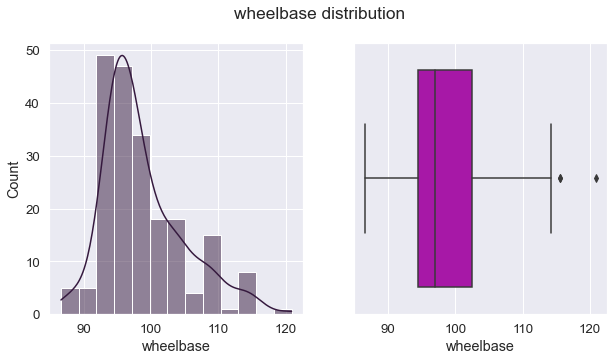

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
wheelbase,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9,34.3,7.9,82.65,114.25


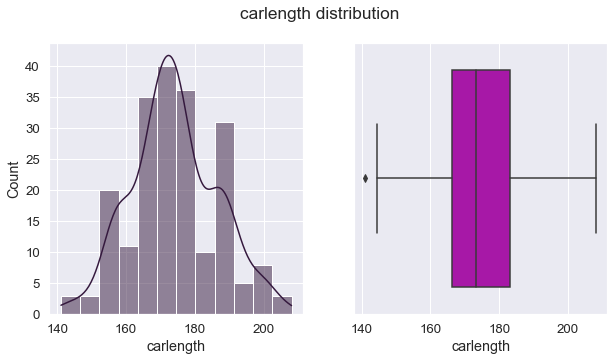

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
carlength,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1,67.0,16.8,141.1,208.3


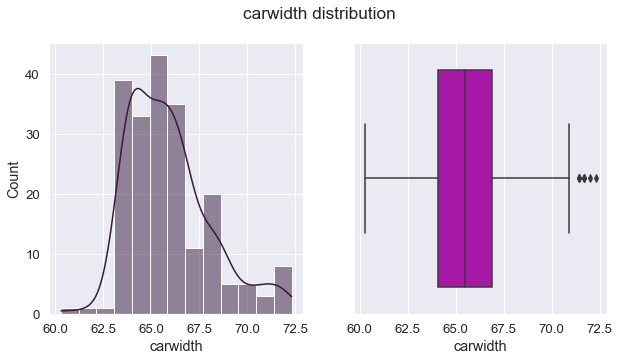

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
carwidth,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3,12.0,2.8,59.9,71.1


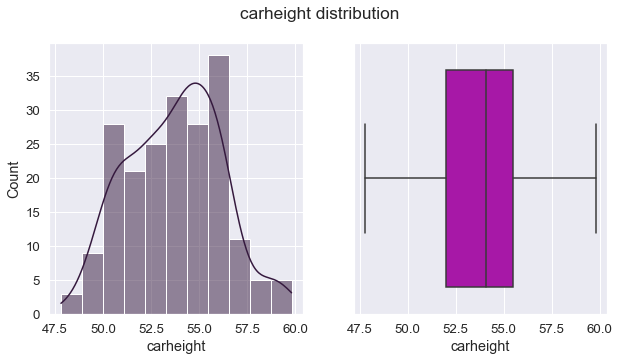

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
carheight,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8,12.0,3.5,46.75,60.75


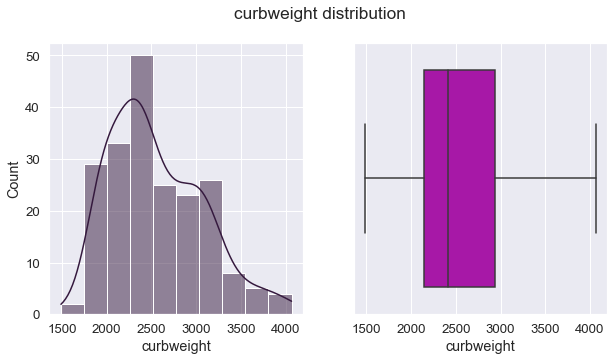

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0,2578.0,790.0,960.0,4120.0


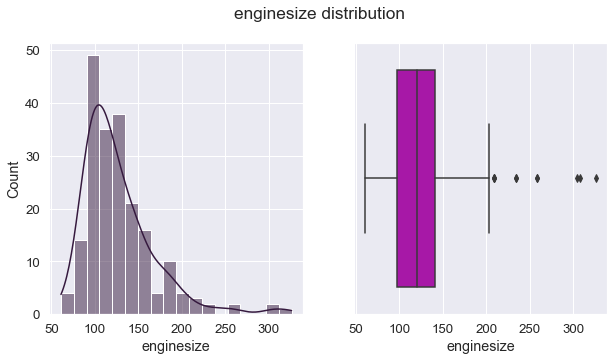

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
enginesize,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0,265.0,44.0,31.0,207.0


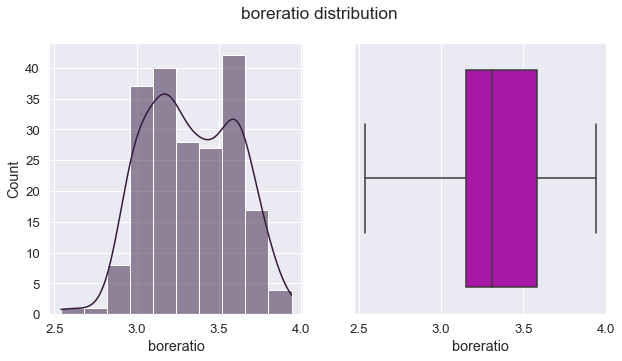

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94,1.4,0.43,2.505,4.225


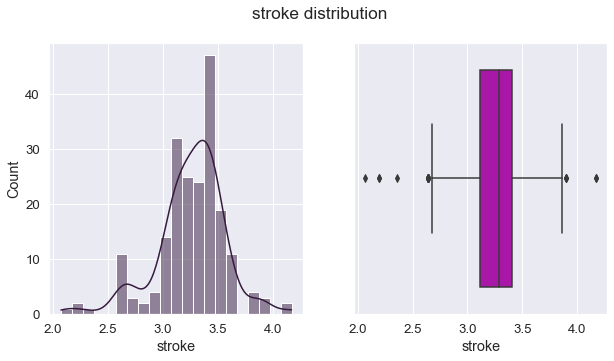

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17,2.1,0.3,2.66,3.86


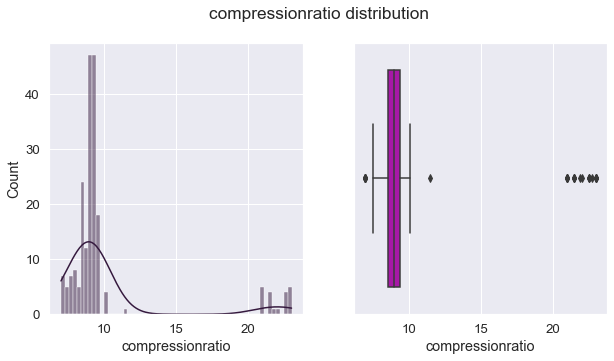

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
compressionratio,205.0,10.142537,3.97204,7.0,8.6,9.0,9.4,23.0,16.0,0.8,7.4,10.6


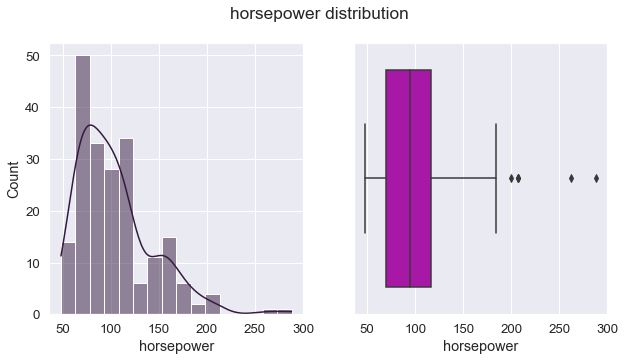

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0,240.0,46.0,1.0,185.0


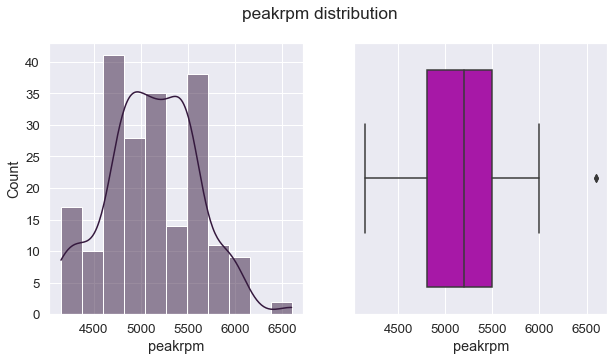

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
peakrpm,205.0,5125.121951,476.985643,4150.0,4800.0,5200.0,5500.0,6600.0,2450.0,700.0,3750.0,6550.0


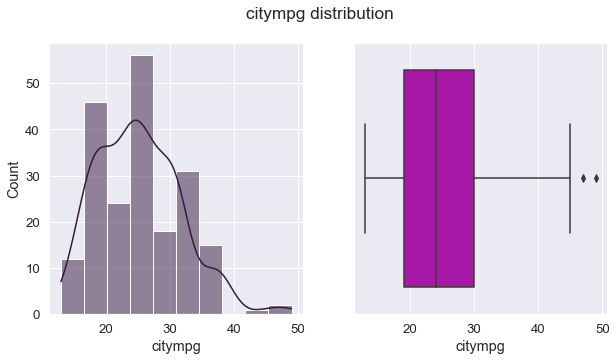

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
citympg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0,36.0,11.0,2.5,46.5


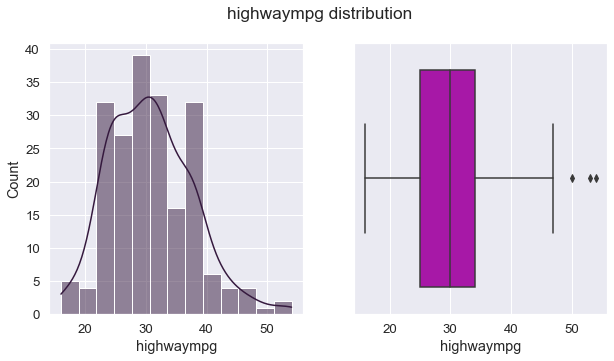

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
highwaympg,205.0,30.75122,6.886443,16.0,25.0,30.0,34.0,54.0,38.0,9.0,11.5,47.5


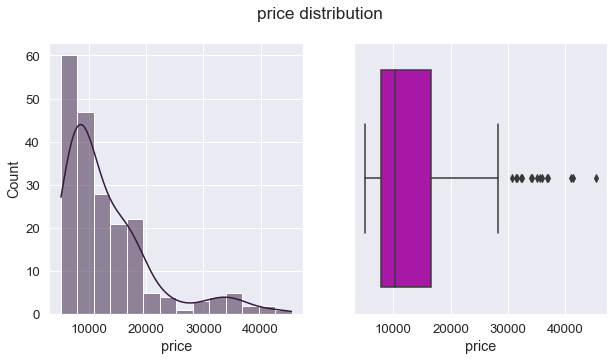

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker
price,205.0,13276.710571,7988.852332,5118.0,7788.0,10295.0,16503.0,45400.0,40282.0,8715.0,-5284.5,29575.5


In [301]:
uni_quantitative(df)

#### Findings:
<ol>
<li>symboling are discrete values </li>
<li>car length has hardly normal distribution with mean 174.049 & standard deviation 12.337 while the median is 173.2 , 50% of the data have the range (166.3,183.1)</li>
<li>car width almost has normal distribution with mean 65.907 & standard deviation 2.14 while the median is 65.5 , 50% of the data have the range (64.1,66.9), there are a fewer outliers</li>
<li>car height almost has normal distribution with mean 53.724 & standard deviation 2.443 while the median is 54.1 , 50% of the data have the range (52.0,55.5)</li>
<li>curb weight skewed right with mean 2555.565 & standard deviation 520.680 while the median is 2414.0 , 50% of the data have the range (2145.0,2935.0)</li>
<li>engine size skewed right with mean 126.907 & standard deviation 41.642 while the median is 41.642 , 50% of the data have the range (97.0,141.0) , there are outliers maximum whisker is 207.0 while dataset has maximum 326.0</li>
<li>bore ratio has normal distribution with mean 3.329 & standard deviation 0.270 while the median is 3.31 , 50% of the data have the range (3.15,3.58).</li>    
<li>stroke has normal distribution with mean 3.255 & standard deviation 0.313 while the median is 3.29 , 50% of the data have the range (3.11,3.41) there are outliers.</li>
<li>comperssion ration has hardly normal distribution with mean 10.142 & standard deviation 3.972 while the median is 9 , 50% of the data have the range (8.6,9.4) there are outliers that's why kde appear skewed right.</li>  
<li>horse power skewed right with mean 104.117 & standard deviation 39.544 while the median is 95.0, 50% of the data have the range (70.0,116.0) there are outliers.</li> 
<li>peakrpm has hardly normal distribution with mean 5125.121 & standard deviation 476.985 while the median is 5200.0, 50% of the data have the range (4800.0,5500.0) there are outliers.</li> 
<li>citympg has hardly normal distribution with mean 25.219	& standard deviation 6.542 while the median is 24.0, 50% of the data have the range (19.0,30.0) there are outliers.</li>
<li>highwaympg has hardly normal distribution with mean 30.751 & standard deviation 6.886 while the median is 25.0, 50% of the data have the range (30.0,34.0) there are outliers.</li> 
<li>price skewed right with mean 13276.710 & standard deviation 7988.852 while the median is 10295.0, 50% of the data have the range (7788.0,16503.0) there are outliers.</li> 
 
</ol>	

In [302]:
outliers= df.iloc[detect_outliers(df,0,['price'])]
outliers

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,0,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,-1,buick,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,-1,buick,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,3,buick,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,0,buick,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


In [303]:
# clean = df.drop(detect_outliers(df,0,['price']))
clean = df.copy()

In [304]:
len(outliers)/len(df)

0.07317073170731707

### Qualitative Univariate analysis

In [305]:
def qualitative_uni(df):
    display(df.describe(include=['O']))
    for col in df.select_dtypes(include=['O']).columns:
        sns.countplot(data=df,y=col)
        plt.title(f'{col} Frequency')
        plt.show()
        if df[col].nunique()<=10:
            print(df[col].value_counts(),'\n','*'*50)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


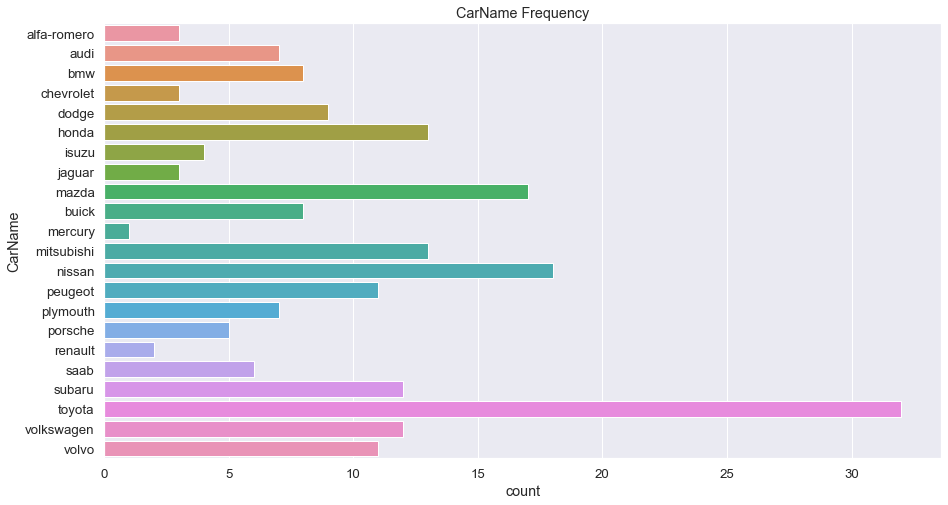

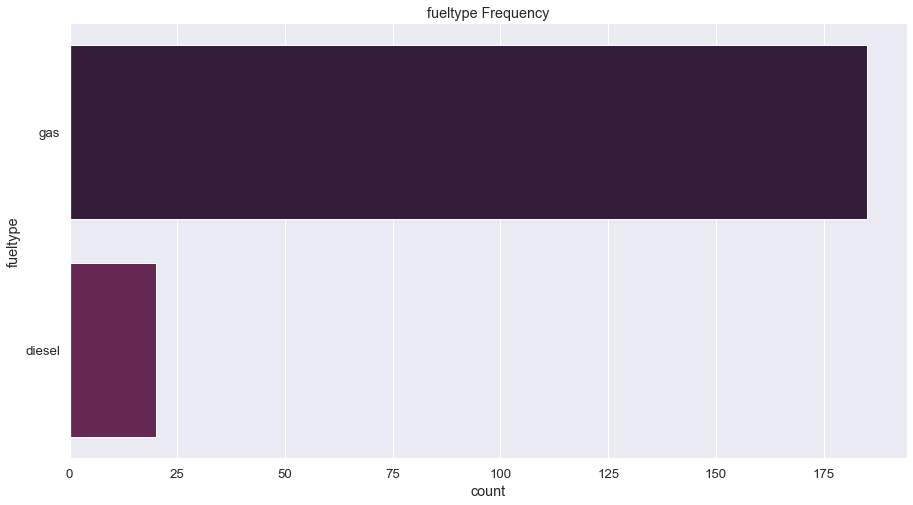

gas       185
diesel     20
Name: fueltype, dtype: int64 
 **************************************************


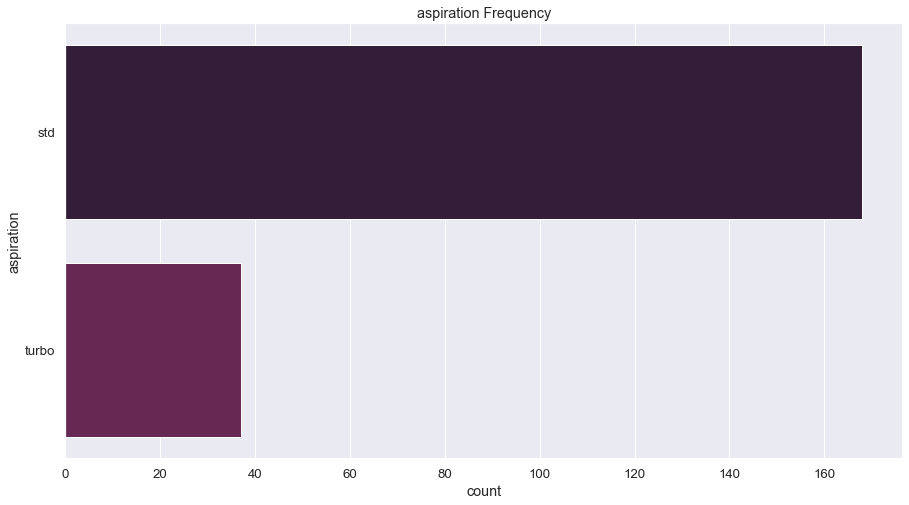

std      168
turbo     37
Name: aspiration, dtype: int64 
 **************************************************


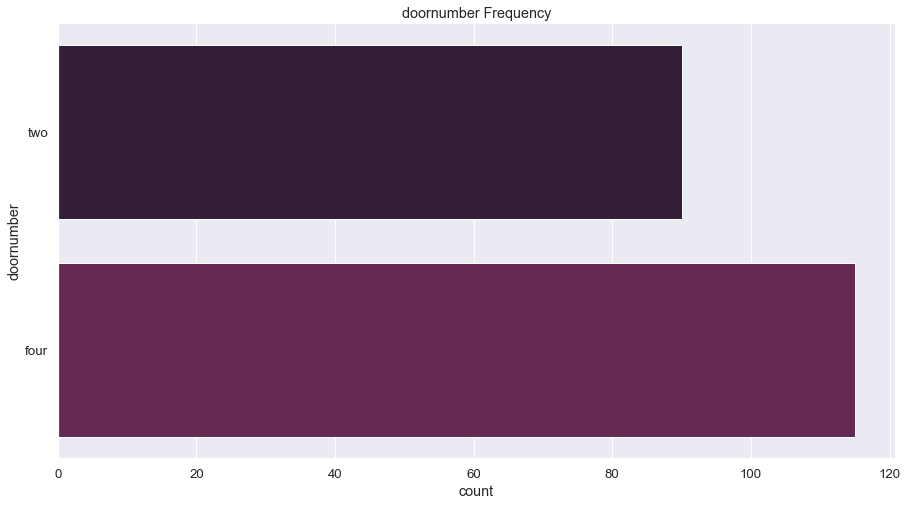

four    115
two      90
Name: doornumber, dtype: int64 
 **************************************************


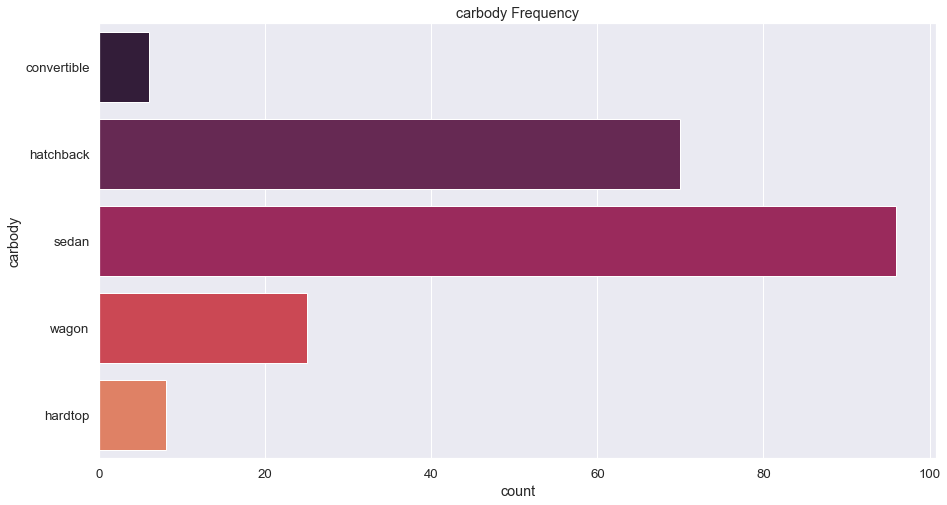

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 
 **************************************************


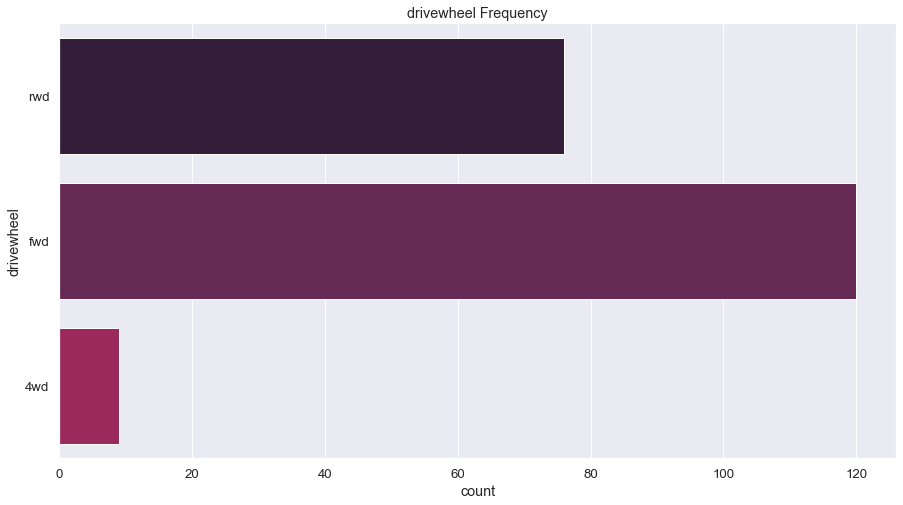

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 
 **************************************************


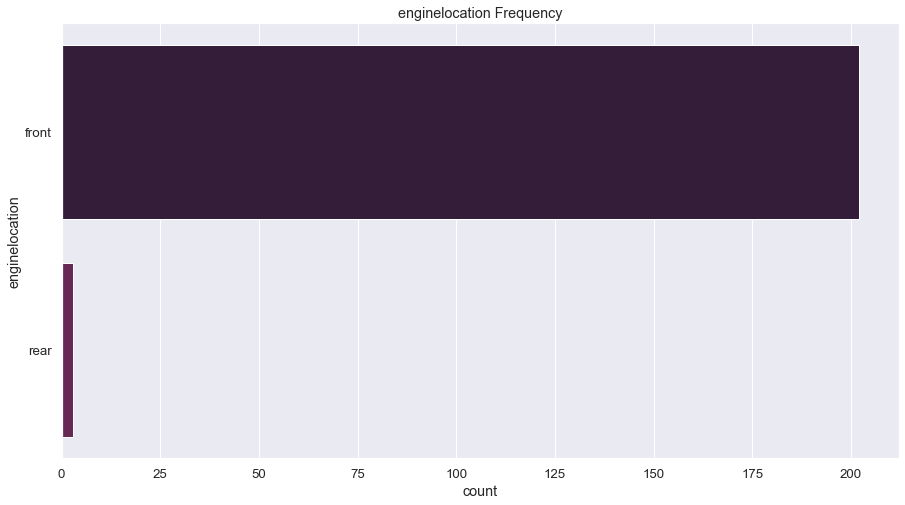

front    202
rear       3
Name: enginelocation, dtype: int64 
 **************************************************


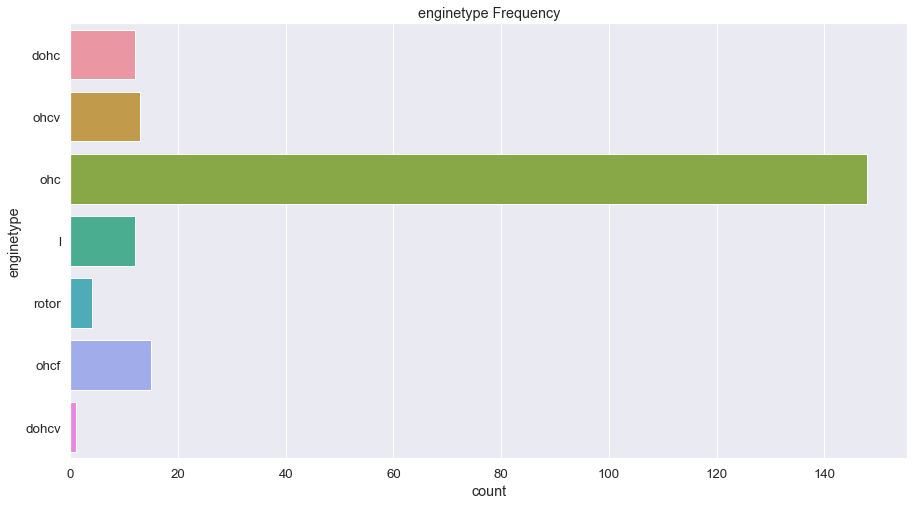

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 
 **************************************************


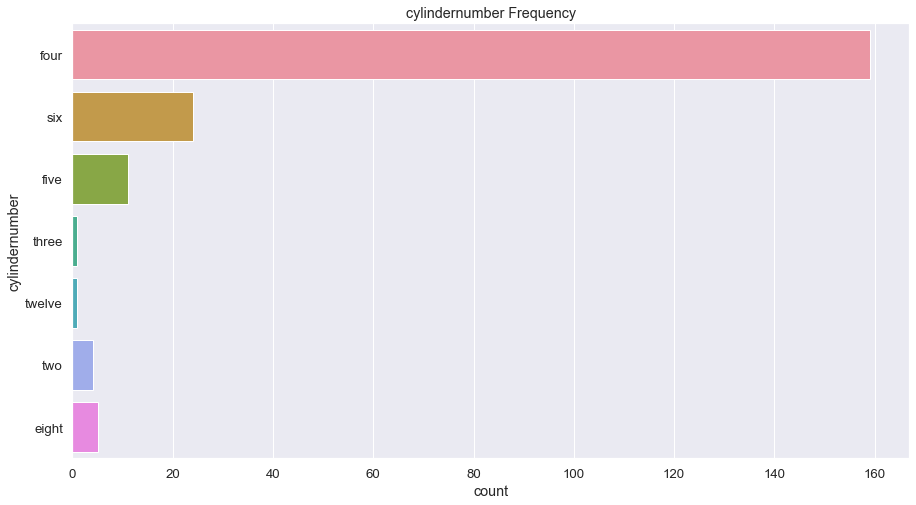

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64 
 **************************************************


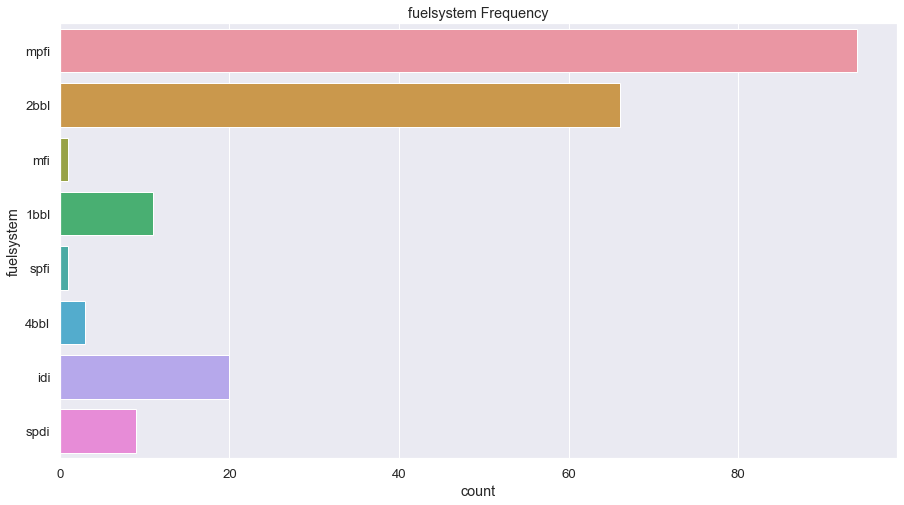

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64 
 **************************************************


In [306]:
qualitative_uni(clean)

In [307]:
clean.drop('enginelocation',axis=1,inplace=True)

### Bivariate analysis
### Quantitative variables

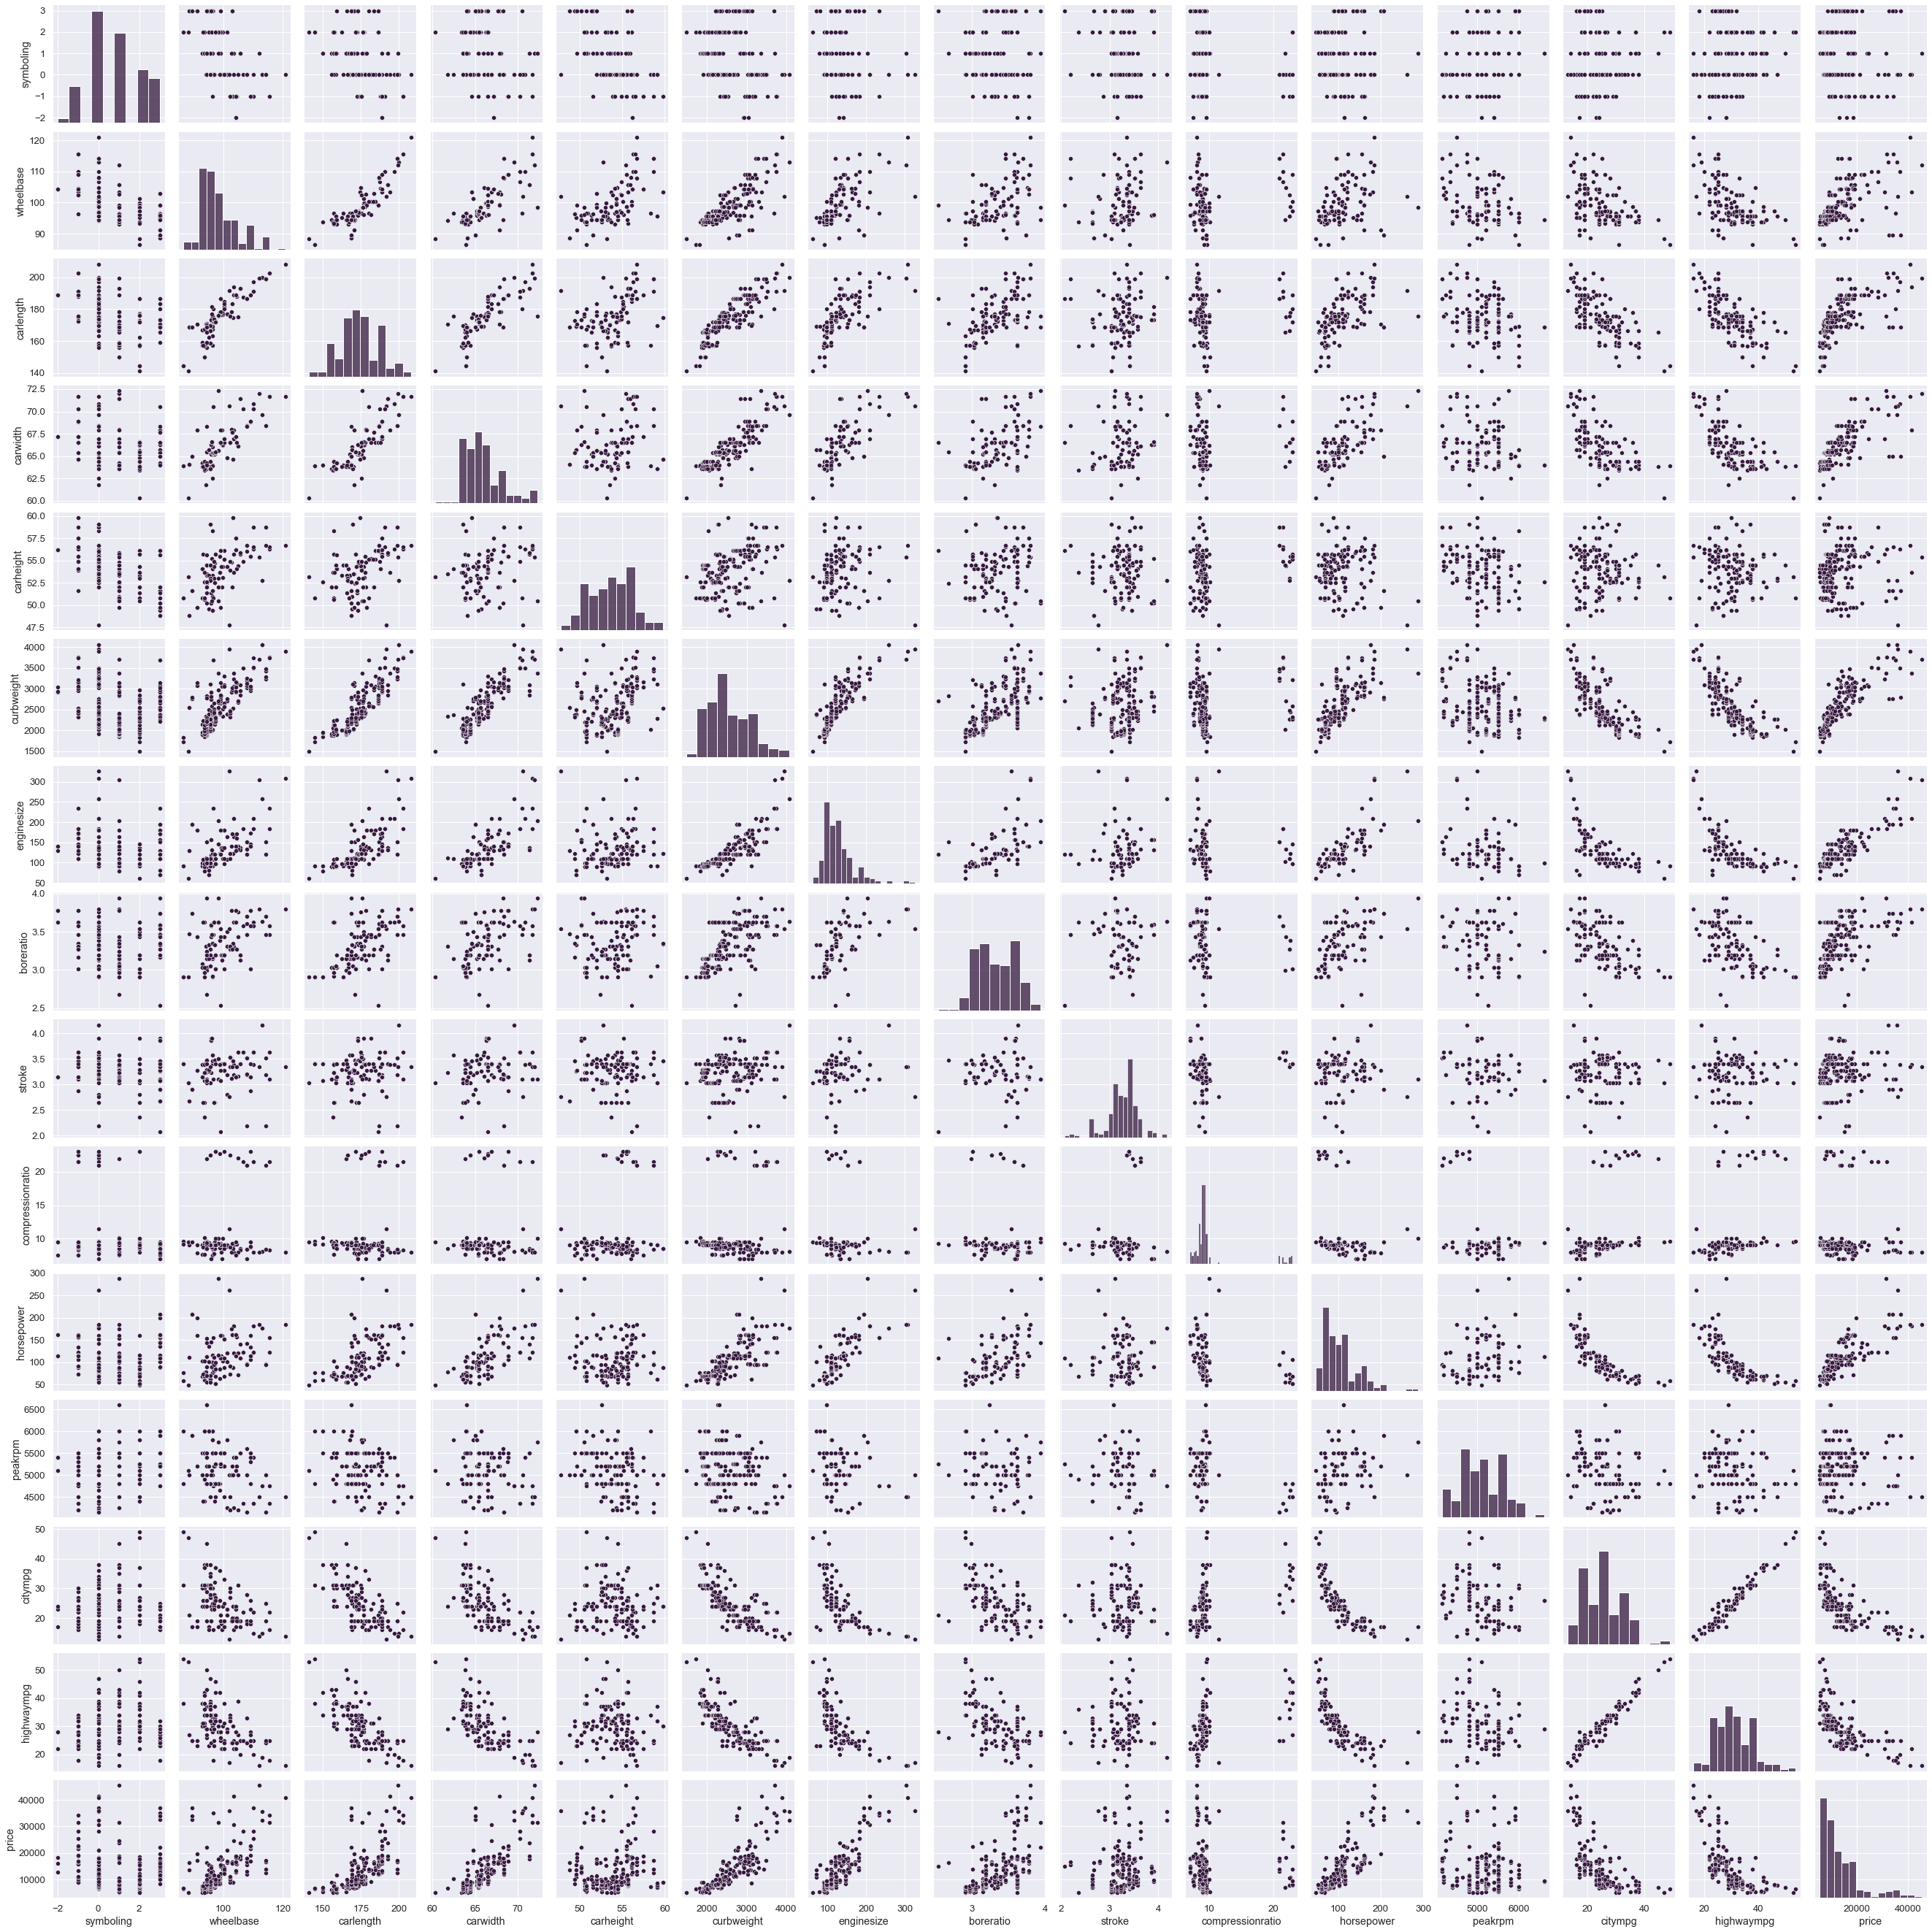

In [308]:
sns.pairplot(clean)

<AxesSubplot:>

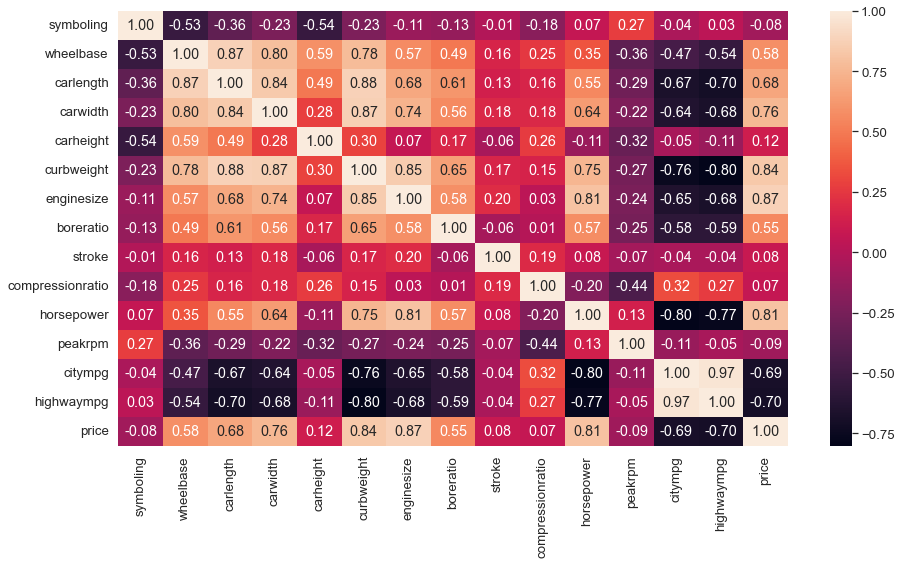

In [309]:
sns.heatmap(clean.corr(),annot=True,fmt='0.2f')

In [310]:
display(clean.corr()[abs(clean.corr())>0.6] )

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,1.000000,0.874587,0.795144,NaN,0.776386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carlength,NaN,0.874587,1.000000,0.841118,NaN,0.877728,0.683360,0.606454,NaN,NaN,NaN,NaN,-0.670909,-0.704662,0.682920
carwidth,NaN,0.795144,0.841118,1.000000,NaN,0.867032,0.735433,NaN,NaN,NaN,0.640732,NaN,-0.642704,-0.677218,0.759325
carheight,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,0.776386,0.877728,0.867032,NaN,1.000000,0.850594,0.648480,NaN,NaN,0.750739,NaN,-0.757414,-0.797465,0.835305
enginesize,NaN,NaN,0.683360,0.735433,NaN,0.850594,1.000000,NaN,NaN,NaN,0.809769,NaN,-0.653658,-0.677470,0.874145
boreratio,NaN,NaN,0.606454,NaN,NaN,0.648480,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

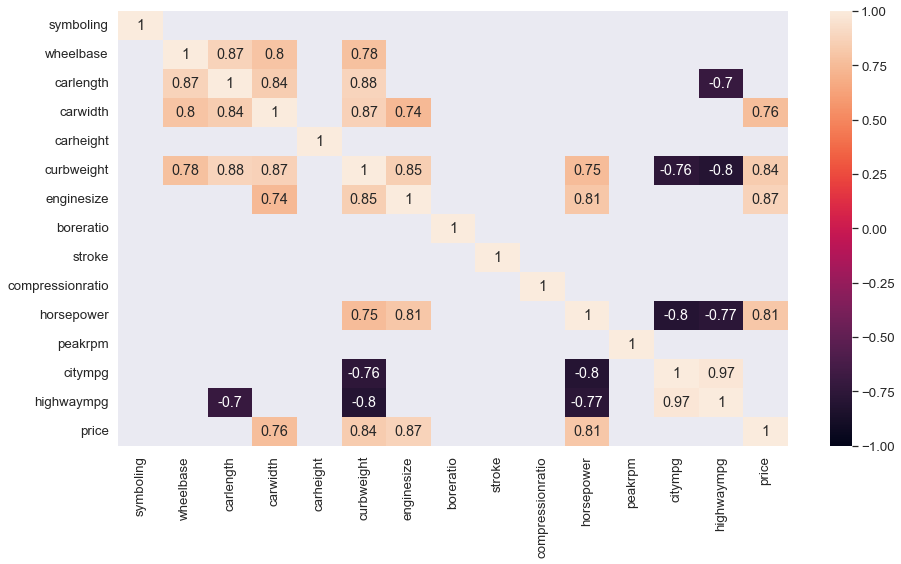

In [311]:
sns.heatmap(clean.corr()[abs(clean.corr())>0.7],vmin=-1,vmax=1,annot=True)

We can find **Multicolinearity** between some features:
* citympg with [curbweight, horsepower & highwaympg]
* highwaympg with [curbweight, horsepower & citympg]
* enginesize with [curbweight, horsepower]
* curbeweight with most of features
* carwidth , carlength, wheelbase & curbweight

select numerical features which heigh correlated with price & have less multicolinearity

In [312]:
price_corr = clean.corr()[abs(clean.corr())['price']>0.3]['price'].index
price_corr

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [313]:
price_corr= price_corr.drop(['wheelbase', 'carlength', 'carwidth','citympg', 'highwaympg'])

In [314]:
price_corr

Index(['curbweight', 'enginesize', 'boreratio', 'horsepower', 'price'], dtype='object')

In [315]:
ncol= clean.select_dtypes(include=['number']).columns
ncol

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [316]:
drop_col = [x for x in ncol if x not in price_corr ]
drop_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'highwaympg']

In [317]:
clean.drop(drop_col,axis=1,inplace=True)

In [318]:
clean

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,alfa-romero,gas,std,two,convertible,rwd,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,audi,gas,std,four,sedan,fwd,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,audi,gas,std,four,sedan,4wd,2824,ohc,five,136,mpfi,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,2952,ohc,four,141,mpfi,3.78,114,16845.0
201,volvo,gas,turbo,four,sedan,rwd,3049,ohc,four,141,mpfi,3.78,160,19045.0
202,volvo,gas,std,four,sedan,rwd,3012,ohcv,six,173,mpfi,3.58,134,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,3217,ohc,six,145,idi,3.01,106,22470.0


<AxesSubplot:>

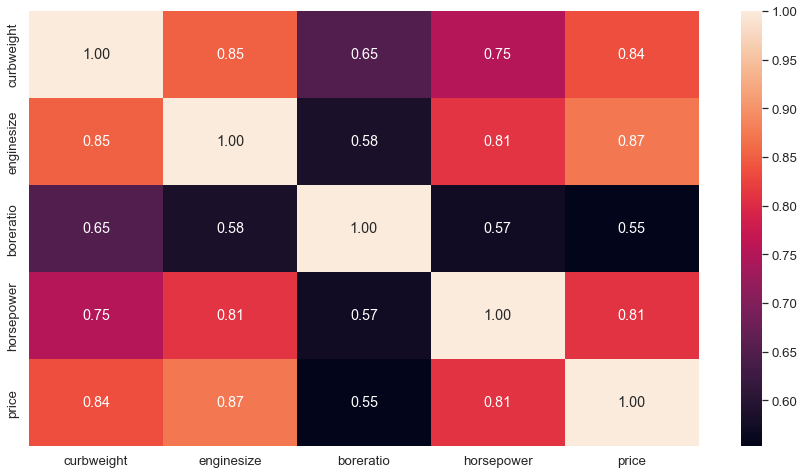

In [319]:
sns.heatmap(clean.corr(),annot=True,fmt='0.02f')

### Qualitative variable with price

C:\Users\Esraa\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


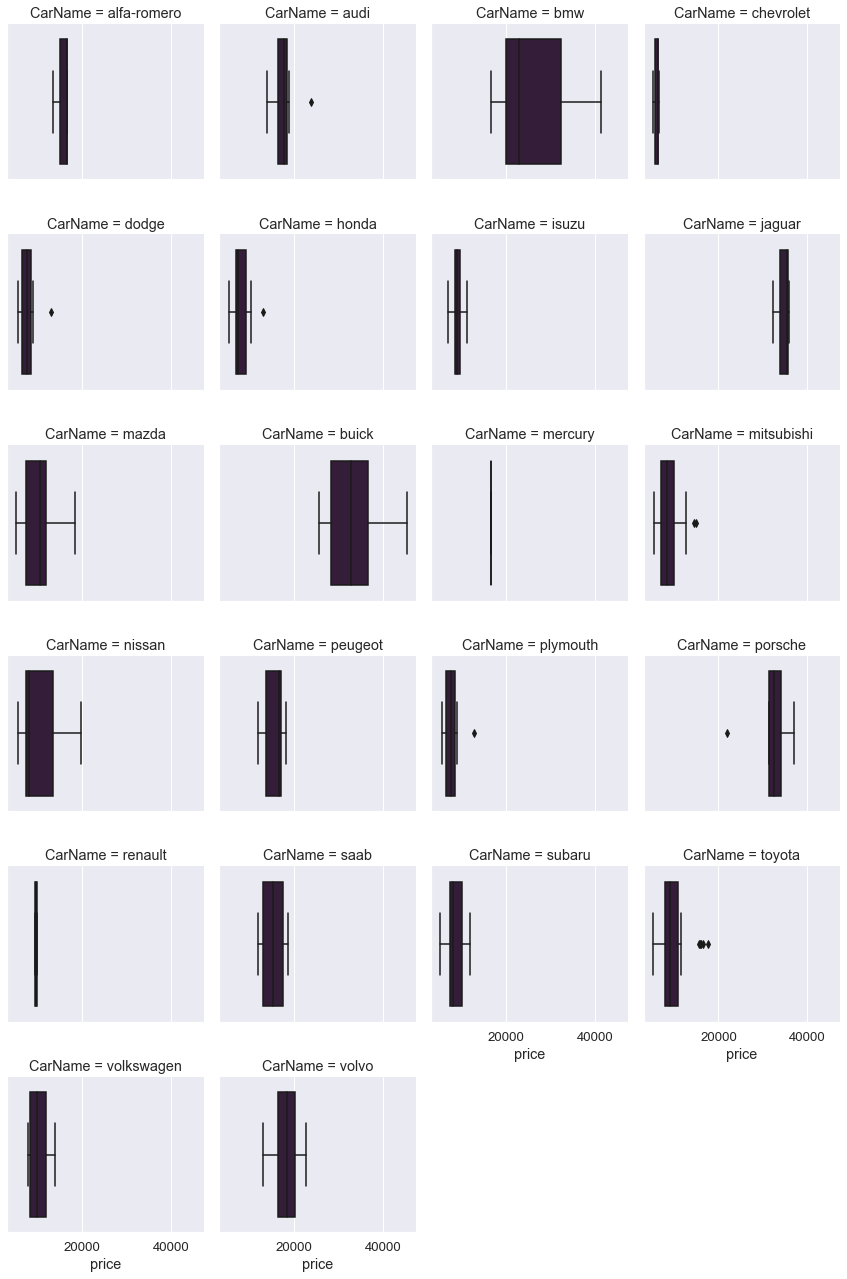

In [320]:
g= sns.FacetGrid(data=clean,col='CarName',col_wrap=4)
g.map(sns.boxplot,'price')

In [321]:
clean.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price'],
      dtype='object')

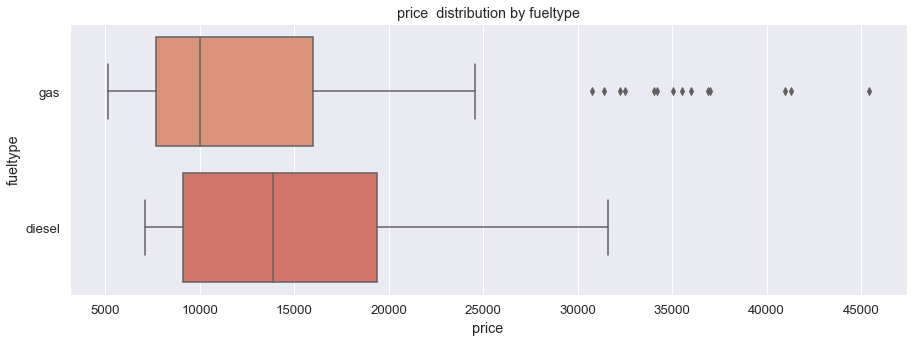

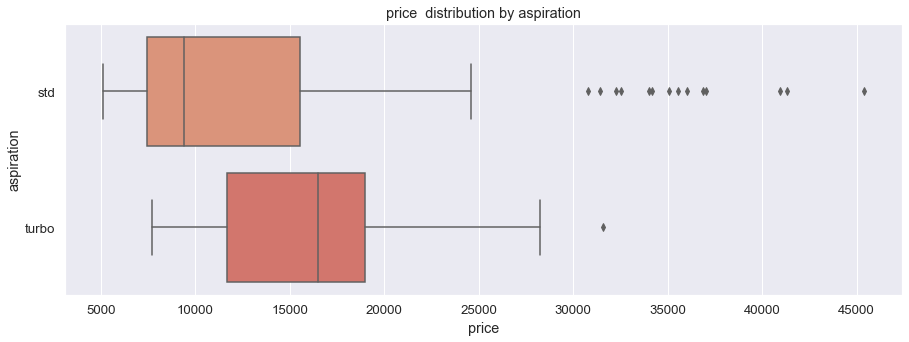

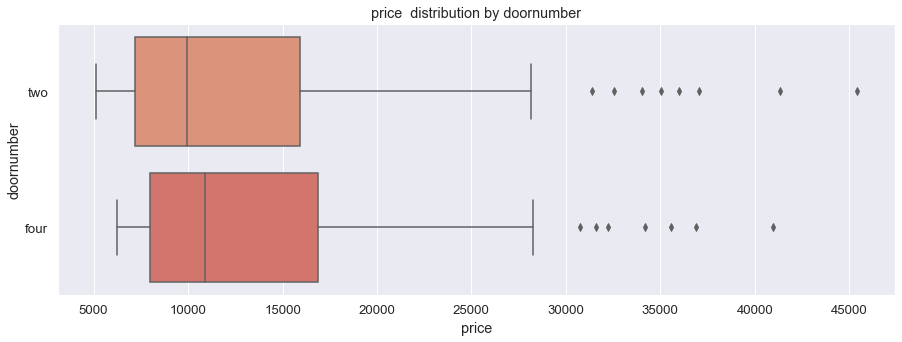

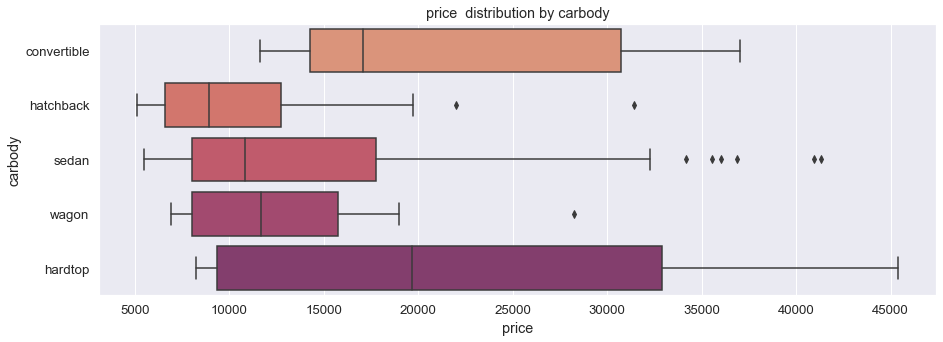

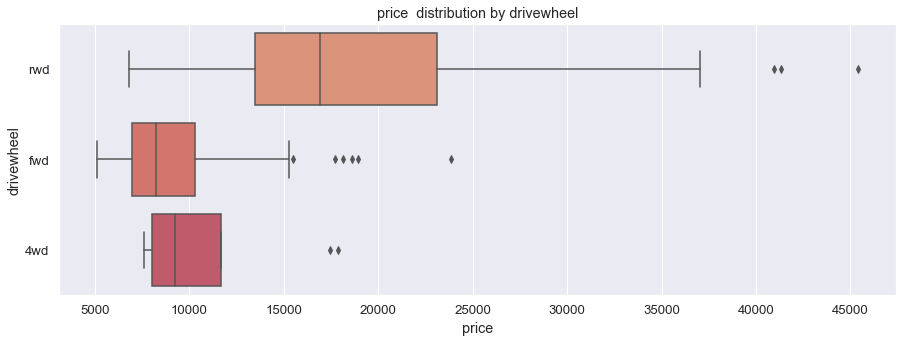

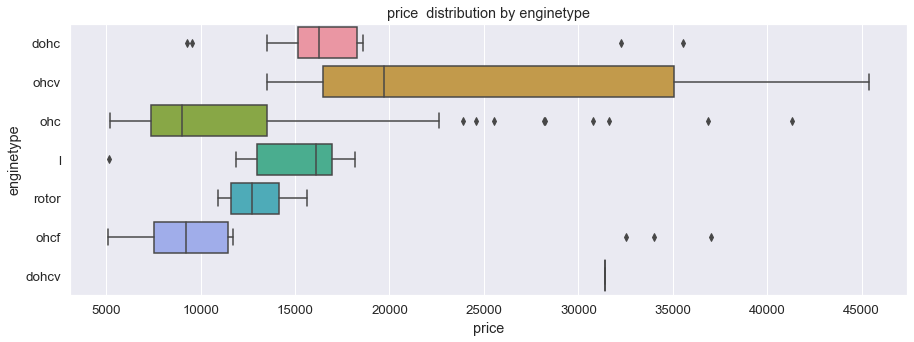

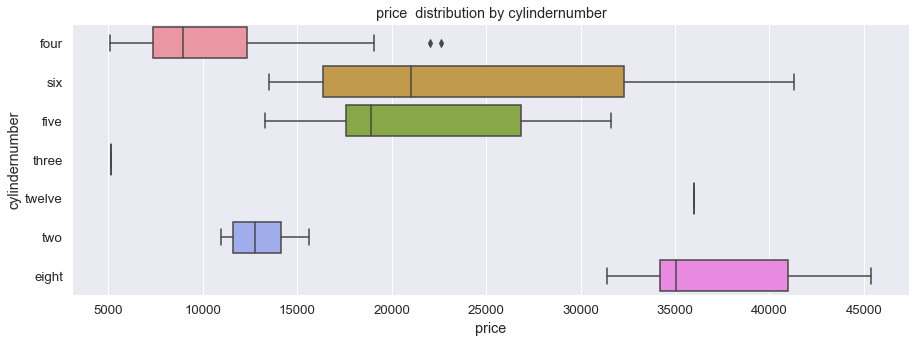

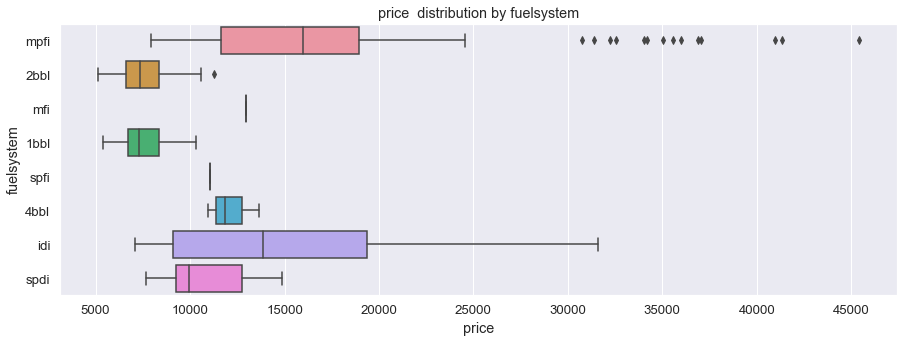

In [322]:
for col in clean.select_dtypes(include=['O']).columns.drop('CarName'):
    sns.set_theme(rc={'figure.figsize':[15,5]},font_scale=1.2,palette='flare')
    sns.boxplot(data=clean,x='price',y=col)
    plt.title(f'price  distribution by {col}')
    plt.show()

### Multivariate analysis

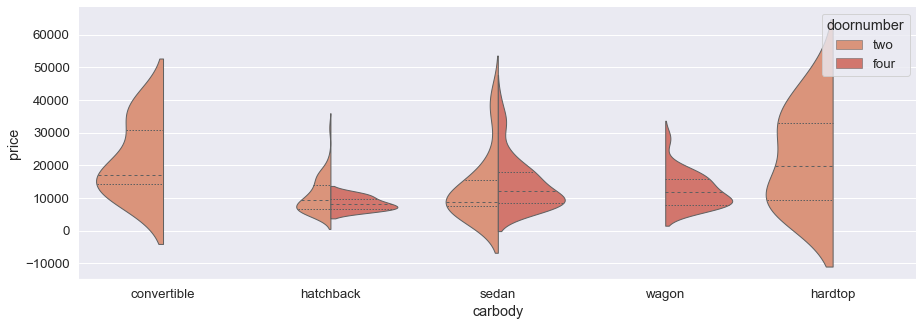

In [323]:
sns.violinplot(data=clean, x="carbody", y="price", hue="doornumber",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

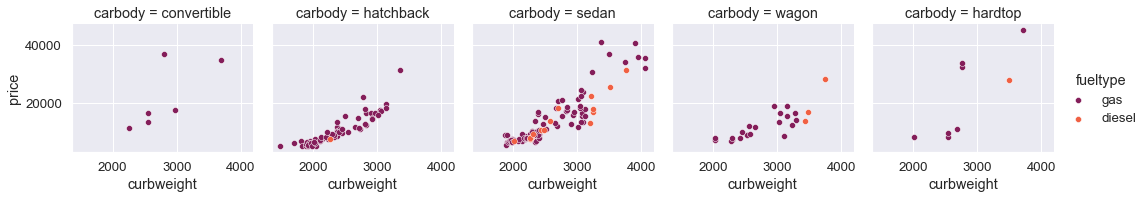

In [324]:
g = sns.FacetGrid(clean, col="carbody", hue="fueltype",palette='rocket')
g.map_dataframe(sns.scatterplot, x="curbweight", y="price")
g.add_legend()

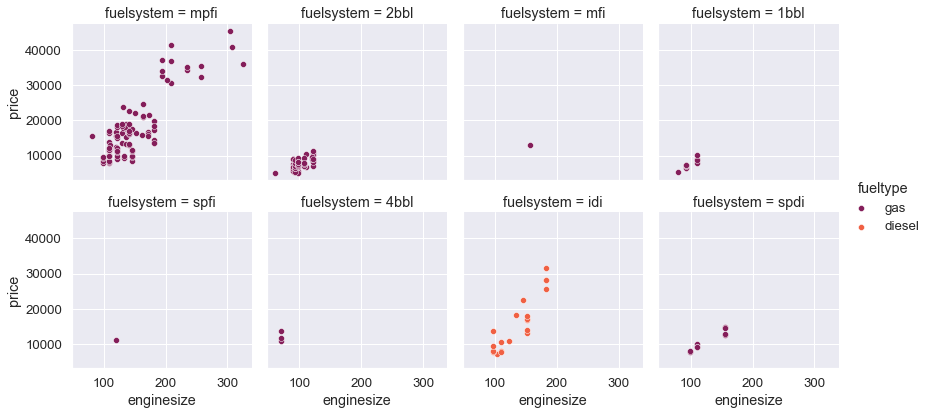

In [325]:
g = sns.FacetGrid(clean, col="fuelsystem", hue="fueltype",palette='rocket',col_wrap=4)
g.map_dataframe(sns.scatterplot, x="enginesize", y="price")
g.add_legend()

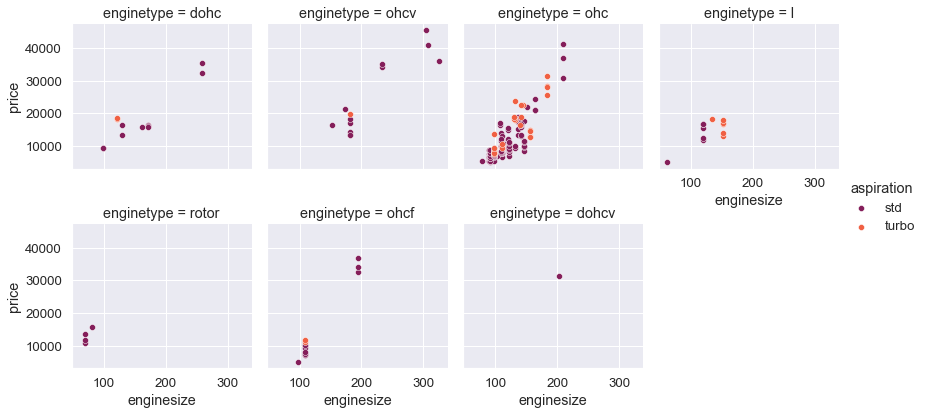

In [326]:
g = sns.FacetGrid(clean, col="enginetype", hue="aspiration",palette='rocket',col_wrap=4)
g.map_dataframe(sns.scatterplot, x="enginesize", y="price")
g.add_legend()

<a id='mchl'></a>
### Machine Learning Models

# Deal with category variable

In [327]:
# clean.drop(['CarName','doornumber','aspiration','fuelsystem','drivewheel'],axis=1,inplace=True)

In [328]:
catg = clean.select_dtypes(include=['O']).columns
catg

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [329]:
clean = pd.get_dummies(data=clean,columns=catg,drop_first=True)
clean

,curbweight,enginesize,boreratio,horsepower,price,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2548,130,3.47,111,13495.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2548,130,3.47,111,16500.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2823,152,2.68,154,16500.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2337,109,3.19,102,13950.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2824,136,3.19,115,17450.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,141,3.78,114,16845.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0
201,3049,141,3.78,160,19045.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0
202,3012,173,3.58,134,21485.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0
203,3217,145,3.01,106,22470.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0


In [330]:
x = clean.drop('price',axis=1)
y = clean['price']

# Apply Feature selection using OLS

In [331]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     68.50
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.32e-83
Time:                        19:39:57   Log-Likelihood:                 172.62
No. Observations:                 205   AIC:                            -243.2
Df Residuals:                     154   BIC:                            -73.76
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.47

In [332]:
x= x.drop(['CarName_audi','CarName_buick','CarName_chevrolet','CarName_dodge','CarName_honda','CarName_isuzu','CarName_mazda','CarName_mercury','CarName_mitsubishi','CarName_nissan','CarName_peugeot','CarName_plymouth','CarName_renault','CarName_saab','CarName_subaru','CarName_jaguar','CarName_toyota','CarName_volkswagen','CarName_volvo'],axis=1)

In [333]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     87.73
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           3.71e-90
Time:                        19:39:58   Log-Likelihood:                 142.49
No. Observations:                 205   AIC:                            -219.0
Df Residuals:                     172   BIC:                            -109.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.44

In [334]:
x.drop(['aspiration_turbo','doornumber_two'],axis=1,inplace=True)

In [335]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     93.70
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           9.08e-92
Time:                        19:39:59   Log-Likelihood:                 141.49
No. Observations:                 205   AIC:                            -221.0
Df Residuals:                     174   BIC:                            -118.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.39

In [336]:
x.drop(['enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor'],axis=1,inplace=True)

In [337]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.14e-94
Time:                        19:40:02   Log-Likelihood:                 137.68
No. Observations:                 205   AIC:                            -221.4
Df Residuals:                     178   BIC:                            -131.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.42

In [338]:
x.drop(['cylindernumber_three','cylindernumber_two','cylindernumber_five','cylindernumber_four'],axis=1,inplace=True)

In [339]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           3.48e-95
Time:                        19:40:02   Log-Likelihood:                 128.84
No. Observations:                 205   AIC:                            -211.7
Df Residuals:                     182   BIC:                            -135.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.42

In [340]:
x.drop(['fuelsystem_2bbl','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spfi','fuelsystem_spdi'],axis=1,inplace=True)

In [341]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.89e-97
Time:                        19:40:04   Log-Likelihood:                 120.45
No. Observations:                 205   AIC:                            -204.9
Df Residuals:                     187   BIC:                            -145.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.41

In [342]:
x.drop(['drivewheel_fwd'],axis=1,inplace=True)

In [343]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.30e-98
Time:                        19:40:05   Log-Likelihood:                 120.45
No. Observations:                 205   AIC:                            -206.9
Df Residuals:                     188   BIC:                            -150.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.41

In [344]:
x.drop(['drivewheel_rwd'],axis=1,inplace=True)

In [345]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.39e-99
Time:                        19:40:05   Log-Likelihood:                 120.12
No. Observations:                 205   AIC:                            -208.2
Df Residuals:                     189   BIC:                            -155.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.38

In [346]:
x.drop(['enginesize'],axis=1,inplace=True)

In [347]:
model_1 = sm.OLS(endog = np.log(y), exog = sm.add_constant(x))
model_1_fit = model_1.fit()
model_1_pred = model_1_fit.predict()

print(model_1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          3.40e-100
Time:                        19:40:06   Log-Likelihood:                 119.41
No. Observations:                 205   AIC:                            -208.8
Df Residuals:                     190   BIC:                            -159.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.36

In [348]:
x

,curbweight,boreratio,horsepower,CarName_bmw,CarName_porsche,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,cylindernumber_six,cylindernumber_twelve,fuelsystem_4bbl,fuelsystem_idi
0,2548,3.47,111,0,0,1,0,0,0,0,0,0,0,0,0
1,2548,3.47,111,0,0,1,0,0,0,0,0,0,0,0,0
2,2823,2.68,154,0,0,1,0,1,0,0,0,1,0,0,0
3,2337,3.19,102,0,0,1,0,0,1,0,0,0,0,0,0
4,2824,3.19,115,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,3.78,114,0,0,1,0,0,1,0,0,0,0,0,0
201,3049,3.78,160,0,0,1,0,0,1,0,0,0,0,0,0
202,3012,3.58,134,0,0,1,0,0,1,0,0,1,0,0,0
203,3217,3.01,106,0,0,0,0,0,1,0,0,1,0,0,1


In [363]:
x.iloc[200]

curbweight               2952.00
boreratio                   3.78
horsepower                114.00
CarName_bmw                 0.00
CarName_porsche             0.00
fueltype_gas                1.00
carbody_hardtop             0.00
carbody_hatchback           0.00
carbody_sedan               1.00
carbody_wagon               0.00
enginetype_dohcv            0.00
cylindernumber_six          0.00
cylindernumber_twelve       0.00
fuelsystem_4bbl             0.00
fuelsystem_idi              0.00
Name: 200, dtype: float64

### split data to train_test_split

In [349]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(164, 15) (41, 15) (164,) (41,)


### standard scale features 

In [350]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

### models

In [351]:
models = {
    'LR':LinearRegression(),
    'SVR':SVR(),
    'KNN':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGB':XGBRegressor()
}

In [352]:
for name,model in models.items():
    print(f'{name} model:')
    print('*'*20)
    model.fit(scaled_x_train,y_train)
    y_pred_train = model.predict(scaled_x_train)
    y_pred_test = model.predict(scaled_x_test)
    print(f'Train Mean squared Error:',mean_squared_error(y_train,y_pred_train))
    print(f'Test Mean squared Error:',mean_squared_error(y_test,y_pred_test))
    print(f'Train Mean absolute Error:',mean_absolute_error(y_train,y_pred_train))
    print(f'Test Mean absolute Error:',mean_absolute_error(y_test,y_pred_test))
    print(f'Train r2_score:',r2_score(y_train,y_pred_train))
    print(f'Test r2_score:',r2_score(y_test,y_pred_test))
    print('-'*50)

LR model:
********************
Train Mean squared Error: 8443187.737580257
Test Mean squared Error: 7618887.1950437315
Train Mean absolute Error: 2117.7656287598875
Test Mean absolute Error: 1879.782213959939
Train r2_score: 0.8805693317840654
Test r2_score: 0.7495245093084051
--------------------------------------------------
SVR model:
********************
Train Mean squared Error: 78506642.37378915
Test Mean squared Error: 30562310.291992527
Train Mean absolute Error: 5836.923447547104
Test Mean absolute Error: 4137.196008672739
Train r2_score: -0.11049298552943854
Test r2_score: -0.004754299556428698
--------------------------------------------------
KNN model:
********************
Train Mean squared Error: 15969652.158842495
Test Mean squared Error: 10405670.867560973
Train Mean absolute Error: 2385.7008146341464
Test Mean absolute Error: 2019.158536585366
Train r2_score: 0.7741059078886232
Test r2_score: 0.657907322971907
--------------------------------------------------
DT mode

## final Model 

In [353]:
model = RandomForestRegressor()
model.fit(scaled_x_train,y_train)
y_predict_test = model.predict(scaled_x_test)

In [359]:
print('mse:',mean_squared_error(y_test,y_predict_test))
print('mae:',mean_absolute_error(y_test,y_predict_test))
print('r2_score:',r2_score(y_test,y_predict_test))

mse: 4985252.195057195
mae: 1374.5559687804875
r2_score: 0.8361068410895229


## Save model

In [361]:
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']